# Exploring Financial Dataset

## Data Exploration Steps 


1. How many columns are there in the data?
These may be features, responses, or metadata.
2. How many rows (samples) are there?
3. What kind of features are there? Which are <b>categorical</b> and which 
are <b>numerical</b>?
Categorical features have values in discrete classes such as "Yes," "No," 
or "Maybe."
Numerical features are typically on a continuous numerical scale, such as 
dollar amounts.
4. What does the data look like in these features?
To see this, you can examine the range of values in numeric features, or the 
frequency of different classes in categorical features, for example.
5. Is there any missing data?


## Business Problem

Our client is a credit card company. They have brought us a dataset that includes 
some demographics and recent financial data, over the past 6 months, for a sample 
of 30,000 of their account holders. This data is at the credit account level; in other 
words, there is one row for each account (you should always clarify what the 
definition of a row is, in a dataset). Rows are labeled by whether, in the next month 
after the 6-month historical data period, an account owner has defaulted, or in other 
words, failed to make the minimum payment

### 1. Goal

The goal is to develop a predictive model for whether an account will default next 
month, given demographics and historical data. Later in the book, we'll discuss the 
practical application of the model.
The data is already prepared, and a data dictionary is available. The dataset supplied 
with the book, <b> default_of_credit_card_clients__courseware_
version_1_21_19.xls</b>, is a modified version of this dataset in the UCI Machine 
Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. 
Have a look at that web page, which includes the data dictionary. 

### 1.01 Verifying data integrity

In [4]:
import pandas as pd
df = pd.read_excel('./Data/default_of_credit_card'\
 '_clients__courseware_version_1_21_19.xls')
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


As can be observed, all column names are listed in the output. The account ID 
column is referenced as ID. The remaining columns appear to be our features, 
with the last column being the response variable. Let's quickly review the dataset 
information that was given to us by the client: 

<b>LIMIT_BAL:</b> Amount of credit provided (in New Taiwanese (NT) dollar) including 
individual consumer credit and the family (supplementary) credit.
<b>SEX</b>: Gender (1 = male; 2 = female).

<b>Note:</b>
We will not be using the gender data to decide credit-worthiness owing to 
ethical considerations.

<b>EDUCATION:</b> Education (1 = graduate school; 2 = university; 3 = high school; 4 
= others). 

<b>MARRIAGE:</b> Marital status (1 = married; 2 = single; 3 = others). </br>

<b>AGE:</b> Age (year).

<b>PAY_1–PAY_6:</b> A record of past payments. Past monthly payments, recorded 
from April to September, are stored in these columns.

<b>PAY_1</b> represents the repayment status in September; </b>PAY_2</b> is the repayment 
status in August; and so on up to <b>PAY_6</b>, which represents the repayment status 
in April.

The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = 
payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 = 
payment delay for 8 months; 9 = payment delay for 9 months and above. 

<b>BILL_AMT1–BILL_AMT6:</b> Bill statement amount (in NT dollar).

<b>BILL_AMT1</b> represents the bill statement amount in September; <b>BILL_AMT2</b>
represents the bill statement amount in August; and so on up to <b>BILL_AMT6</b>, 
which represents the bill statement amount in April.
<b>PAY_AMT1–PAY_AMT6:</b> Amount of previous payment (NT dollar). <b>PAY_AMT1</b>
represents the amount paid in September; <b>PAY_AMT2</b> represents the amount 
paid in August; and so on up to PAY_AMT6, which represents the amount paid 
in April.

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The <b>ID</b> column seems like it contains unique identifiers. To verify whether 
they are in fact unique throughout the whole dataset, we can count the number 
of unique values using the .nunique() method on the Series (aka column) <b>ID</b>. 

In [8]:
df['ID'].nunique()

29687

So there are total of 29687 unique records in the whole dataset

In [9]:
df.shape

(30000, 25)

Total of 30000 records but only 29687 rows? This 
implies that the ID is not a unique identifier for the rows of the data. 

We can use the <b>.value_counts()</b> method on the ID Series to start to answer 
these questions. This is similar to a group <b>by/count</b> procedure in SQL. It will list 
the unique IDs and how often they occur. We will perform this operation in the 
next step and store the value counts in the <b>id_counts</b> variable.

In [11]:
id_counts = df['ID'].value_counts()
id_counts.head(10)

ffa0f012-3bd7    2
94d59251-fa7f    2
82da3aa5-97a6    2
3d832783-1571    2
94e1b326-8c22    2
3fd4854f-8752    2
3cd5c728-df14    2
ff619017-560f    2
56945919-0933    2
823267c1-561b    2
Name: ID, dtype: int64

In [12]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

Here, we can see that most IDs occur exactly once, as expected. However, <b>313</b>
IDs occur twice. So, no ID occurs more than twice. With this information, we are 
ready to begin taking a closer look at this data quality issue and go about fixing 
it. We will create Boolean masks to do this.

In [14]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

ffa0f012-3bd7    True
94d59251-fa7f    True
82da3aa5-97a6    True
3d832783-1571    True
94e1b326-8c22    True
Name: ID, dtype: bool

Our next step is to use this logical mask to select the IDs that are duplicated. 
The IDs themselves are contained as the index of the <b>id_count</b> Series. We can 
access the index in order to use our logical mask for selection purposes.

In [17]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [18]:
dupe_ids[0:5]

['ffa0f012-3bd7',
 '94d59251-fa7f',
 '82da3aa5-97a6',
 '3d832783-1571',
 '94e1b326-8c22']

By performing the following steps, we are essentially filtering the 
DataFrame in order to view all the columns for the first three duplicate IDs

In [19]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2005,ffa0f012-3bd7,20000,1,2,2,34,Not available,-2,-2,-2,...,2280,1500,780,1530,750,1140,3000,780,0,0
2105,ffa0f012-3bd7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2644,82da3aa5-97a6,170000,2,2,1,49,1,2,0,0,...,145689,33588,0,0,6320,5045,1000,0,0,1
2744,82da3aa5-97a6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8122,94d59251-fa7f,130000,1,2,2,30,Not available,0,0,0,...,131743,131986,131430,4800,5250,5050,5700,5100,5012,0
8222,94d59251-fa7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It should be clear that you ought to delete the rows with all 
zeros.

In [21]:
# Mask to filter rows with invalid 0s data
df_zero_mask = df == 0
# Create a Boolean Series, feature_zero_mask, that identifies every row where all the elements starting from the second column
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [23]:
# Clean the DataFrame by eliminating the rows with all zeros, except for the ID
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
# Verify the number of rows and columns in df_clean_1
df_clean_1.shape

(29685, 25)

In [24]:
# Obtain the number of unique IDs
df_clean_1['ID'].nunique()

29685

In [ ]:
# Save the cleaned data
df_clean_1.to_csv('./Data/df_clean_1.csv', index=False

### 1.02 Exploring and cleaning the data

In [25]:
import pandas as pd

df_clean_1 = pd.read_csv('./Data/df_clean_1.csv')
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [26]:
# The values of PAY_1 is the payment status of the most recent month's bill, using the values –1, 1, 2, 3, and so on
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [28]:
# Obtain the value counts for the PAY_1 column by using the .value_
# counts() method
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Use a logical mask with the != operator (which means "does not equal" in 
Python) to find all the rows that don't have missing data for the PAY_1 feature

In [29]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]


0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [31]:
# Check how many rows have no missing data
sum(valid_pay_1_mask)

26664

In [34]:
# Clean the data by eliminating the rows with the missing values of PAY_1 as shown
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [35]:
df_clean_2['PAY_1'].value_counts()

0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [36]:
# convert the data type for PAY_1 from object to int64
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


• -2 means the account started that month with a zero balance and never used 
any credit.

• -1 means the account had a balance that was paid in full.

• 0 means that at least the minimum payment was made, but the entire balance 
wasn't paid (that is, a positive balance was carried to the next month).

In [40]:
# Save cleaned data
df_clean_2.to_csv('./Data/df_clean_2.csv', index=False)

### 1.03 Exploring the Credit Limit and Demographic Features

   We'll start our exploration of data with the credit limit and age features:
   
   We will visualize them and get summary statistics to check that the data 
contained in these features is sensible. Then we will look at the education and 
marriage categorical features to see if the values there make sense, correcting 
them as necessary. LIMIT_BAL and AGE are numerical features, meaning they are 
measured on a continuous scale. Consequently, we'll use histograms to visualize 
them.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC07466E10>,
      dtype=object)

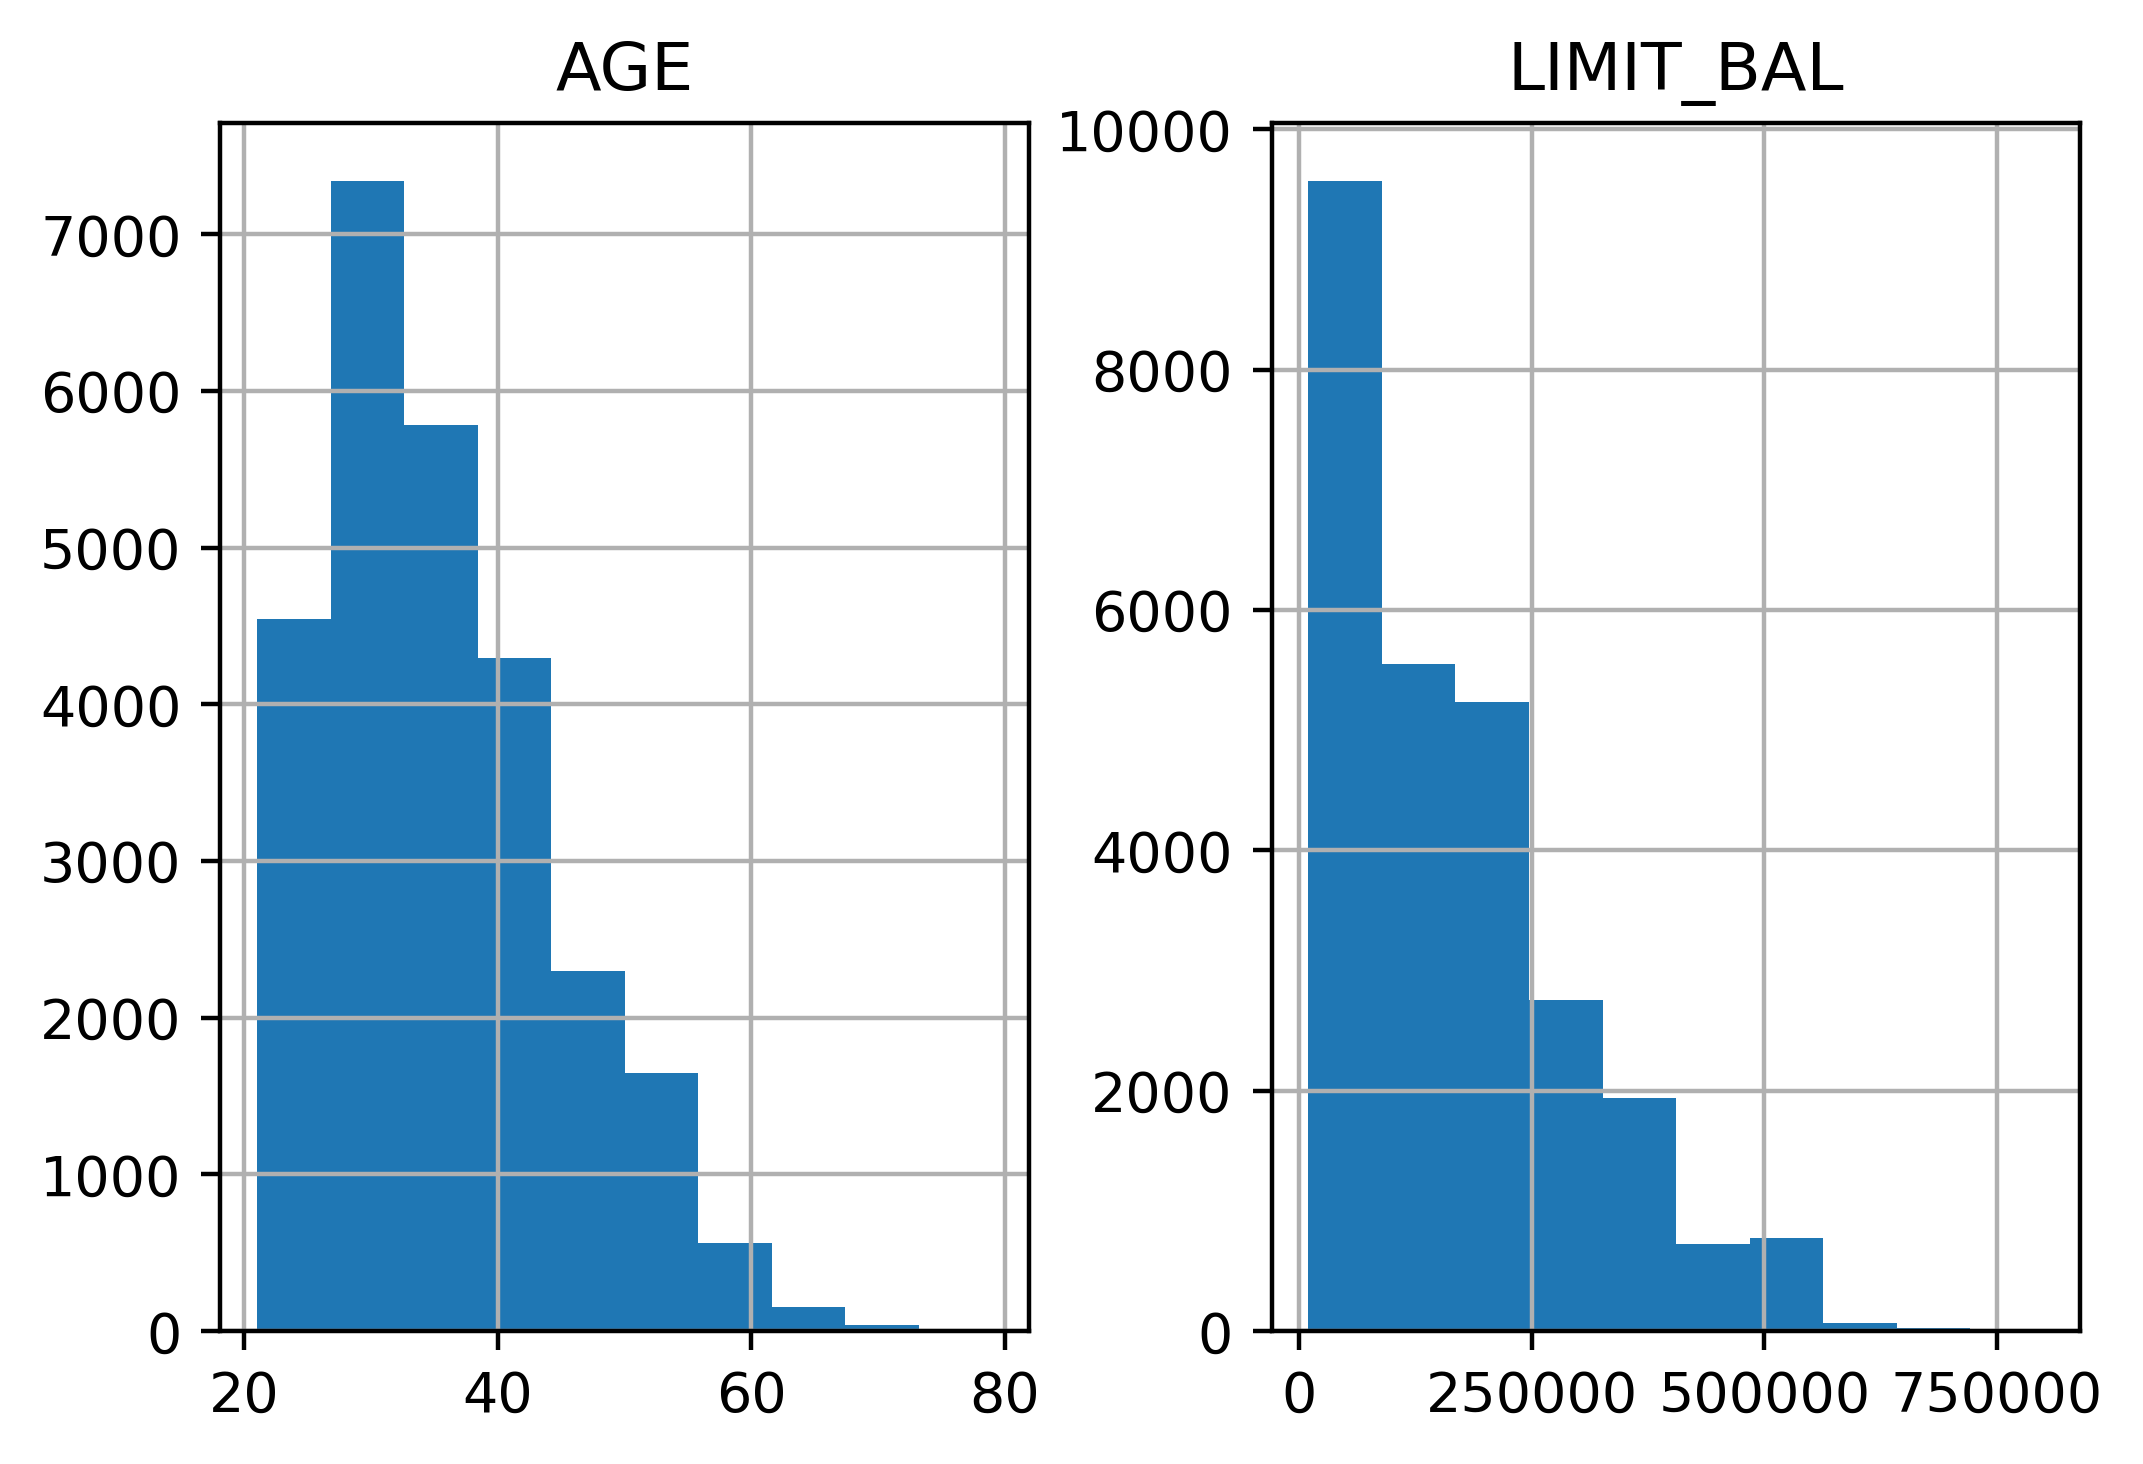

In [43]:
df_clean_2 = pd.read_csv('./Data/df_clean_2.csv')
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [44]:
# Generate a tabular report of summary statistics
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


<b>LIMIT_BAL</b>, the credit limit, seems to make sense. The credit limits have a 
minimum of 10,000. This dataset is from Taiwan; the exact unit of currency 
(NT dollar) may not be familiar, but intuitively, a credit limit should be above 
zero. You are encouraged to look up the conversion to your local currency and 
consider these credit limits. For example, 1 US dollar is about 30 NT dollars.

The <b>AGE</b> feature also looks reasonably distributed, with no one under the age of 
21 having a credit account.

In [46]:
# Obtain the value counts for the EDUCATION
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Here, we see undocumented education levels 0, 5, and 6, as the data 
dictionary describes only <b> Education (1 = graduate school; 2 = 
university; 3 = high school; 4 = others) </b>. Our business partner 
tells us they don't know about the others. Since they are not very prevalent, we 
will lump them in with the others category, which seems appropriate.

In [47]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],\
                                value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()


2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [48]:
# Obtain the value counts for the MARRIAGE
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

The issue here is similar to that encountered for the EDUCATION feature; there 
is a value, 0, which is not documented in the data dictionary: 1 = married; 2 
= single; 3 = others. So we'll lump it in with others.

In [49]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, \
                               inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [ ]:
# Save cleaned MARRIAGE and EDUCATION data
df_clean_2.to_csv('./Data/df_clean_2_01.csv', index=False)

Group the data by the values in the <b>EDUCATION</b> feature and then within 
each group aggregate the data together using the average of the <b>default 
payment next month</b> response variable

Text(0.5, 0, 'Education level: ordinal encoding')

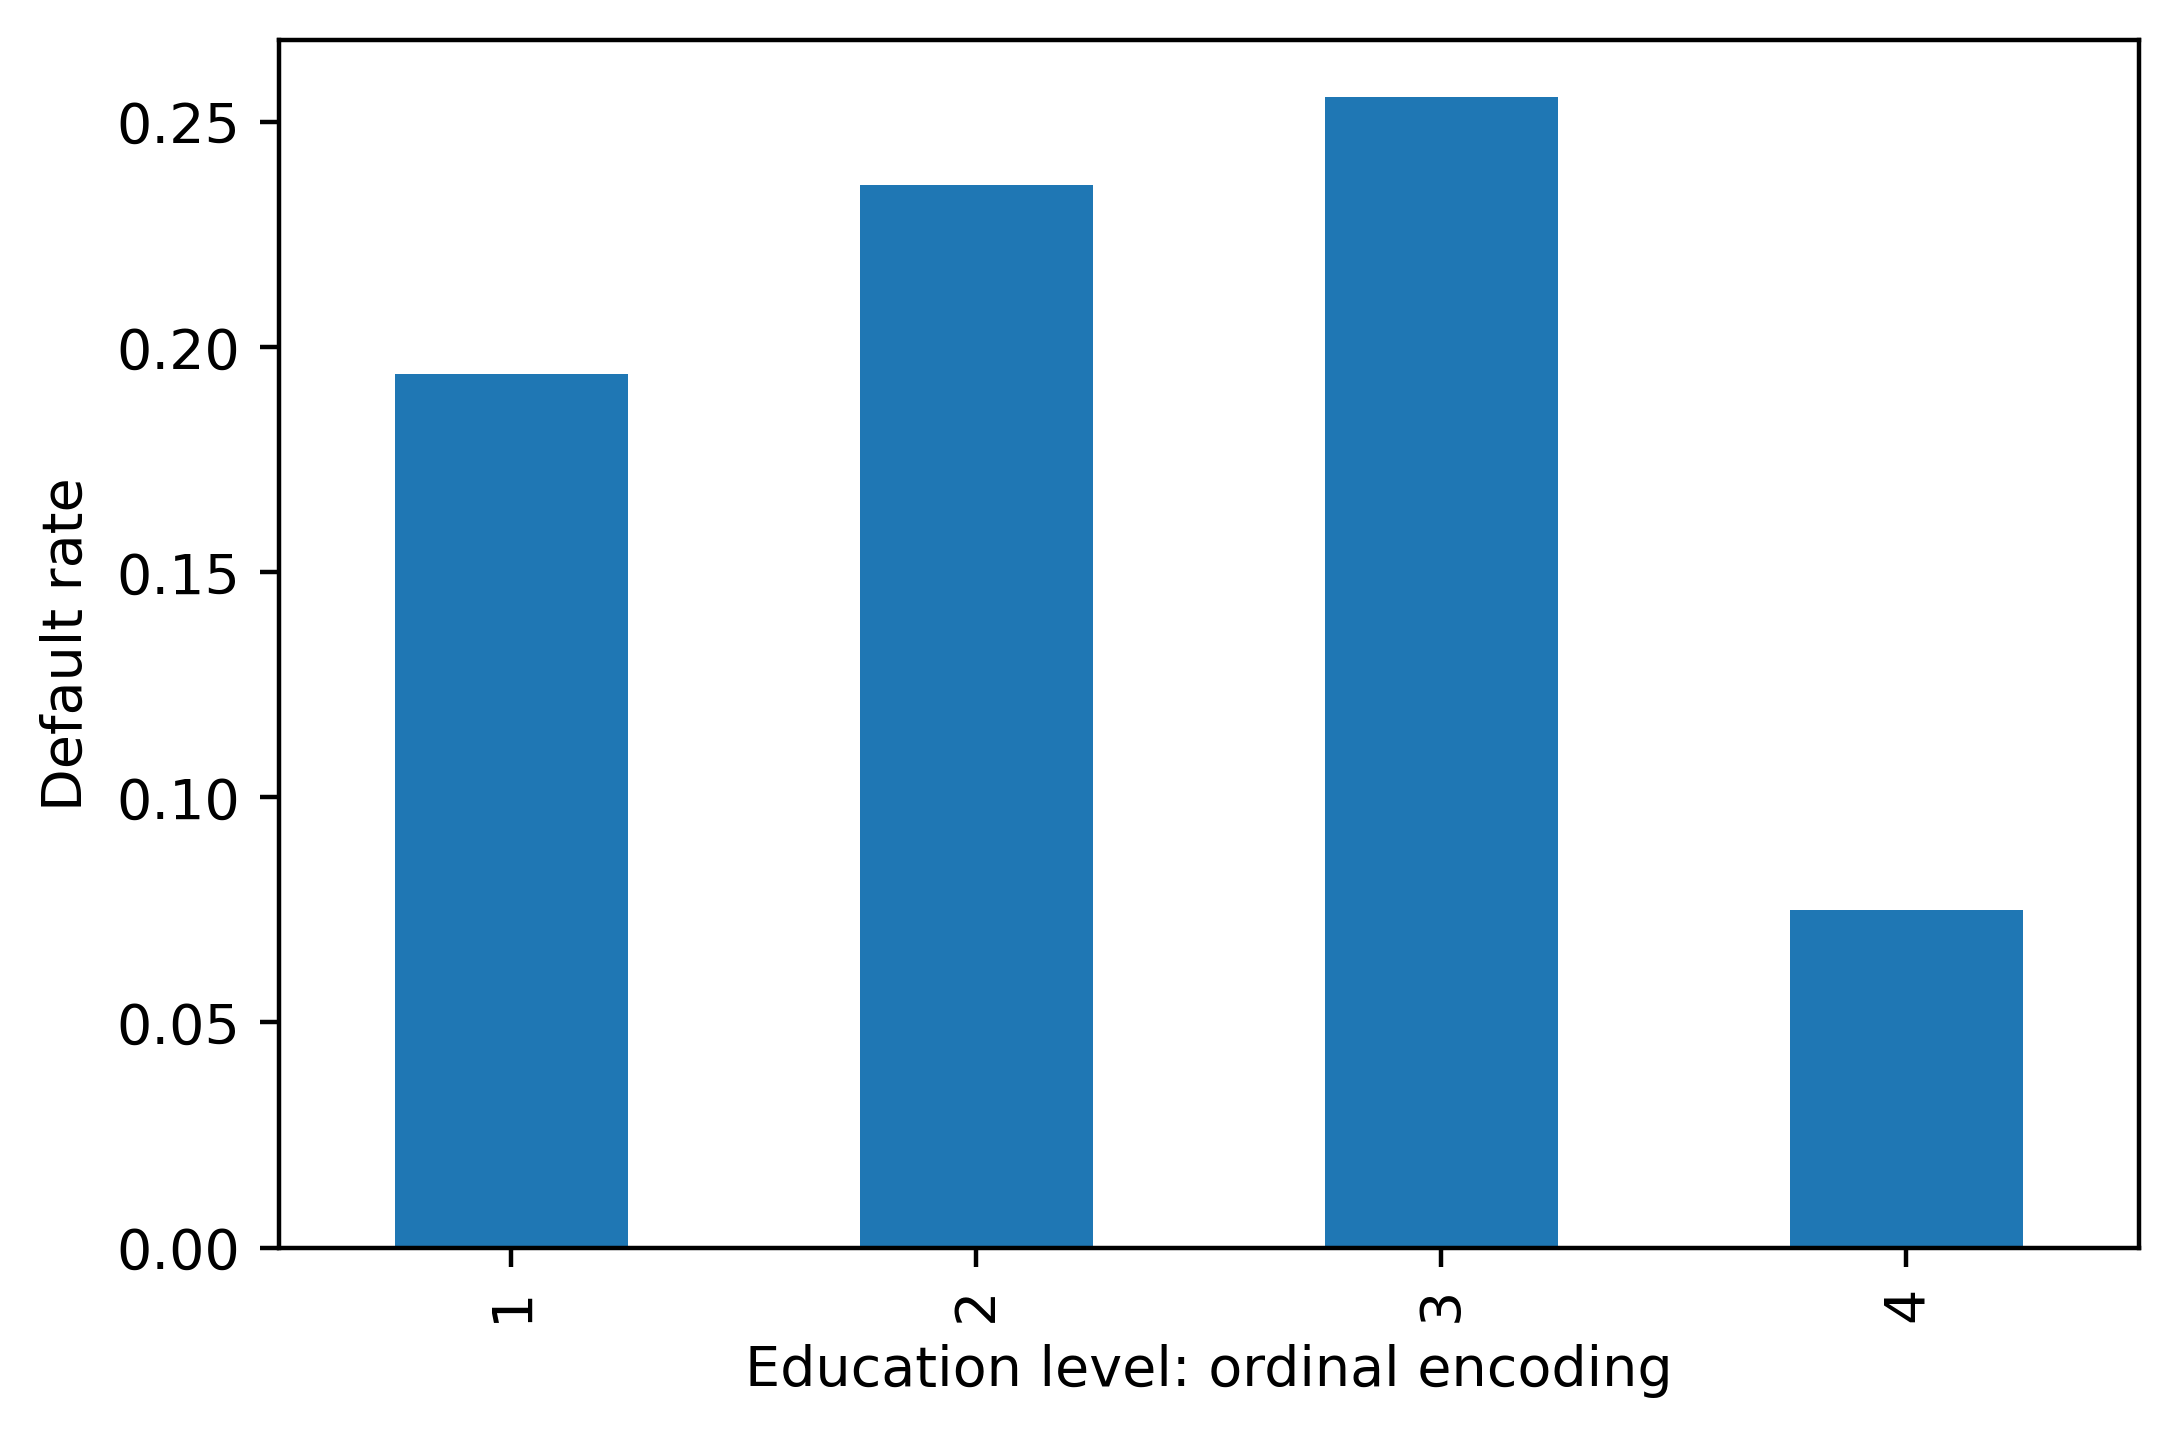

In [50]:
df_clean_2 = pd.read_csv('./Data/df_clean_2_01.csv')
df_clean_2.groupby('EDUCATION').agg({'default payment next '\
 'month':'mean'})\
 .plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [51]:
# Create an empty column for the categorical labels called EDUCATION_CAT
df_clean_2['EDUCATION_CAT'] = 'none'

In [52]:
# Create a dictionary that describes the mapping for education categories
cat_mapping = {1: "graduate school",\
 2: "university",\
 3: "high school",\
               4: "others"}


In [53]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION']\
 .map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [54]:
# create a one-hot encoded DataFrame of the EDUCATION_CAT column
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [56]:
# Check validity of OHE data frame
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',\
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [58]:
df_with_ohe.to_csv('./Data/Chapter_1_cleaned_data.csv', index=False)

### 2 Exploring the Financial History Features in the Dataset

In [59]:
df = pd.read_csv('./Data/Chapter_1_cleaned_data.csv')

The remaining features to be examined are the financial history features. They fall 
naturally into three groups: the status of the monthly payments for the last 6 months, 
and the billed and paid amounts for the same period.

In [60]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', \
             'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Here, we observe that the range of values is the same for all of these features: -2, -1, 
0, ... 8. It appears that the value of 9, described in the data dictionary as payment delay 
for nine months and above, is never observed.

Notice that, because of the definition of the other values of this variable (1 = payment 
delay for 1 month; 2 = payment delay for 2 months, and so on), this feature is sort 
of a hybrid of categorical and numerical features. Why should no credit usage 
correspond to a value of -2, while a value of 2 means a 2-month late payment, and 
so forth? We should acknowledge that the numerical coding of payment statuses -2, 
-1, and 0 constitute a decision made by the creator of the dataset on how to encode 
certain categorical features, which were then lumped in with a feature that is truly 
numerical: the number of months of payment delay (values of 1 and larger). Later 
on, we will consider the potential effects of this way of doing things on the predictive 
capability of this feature.


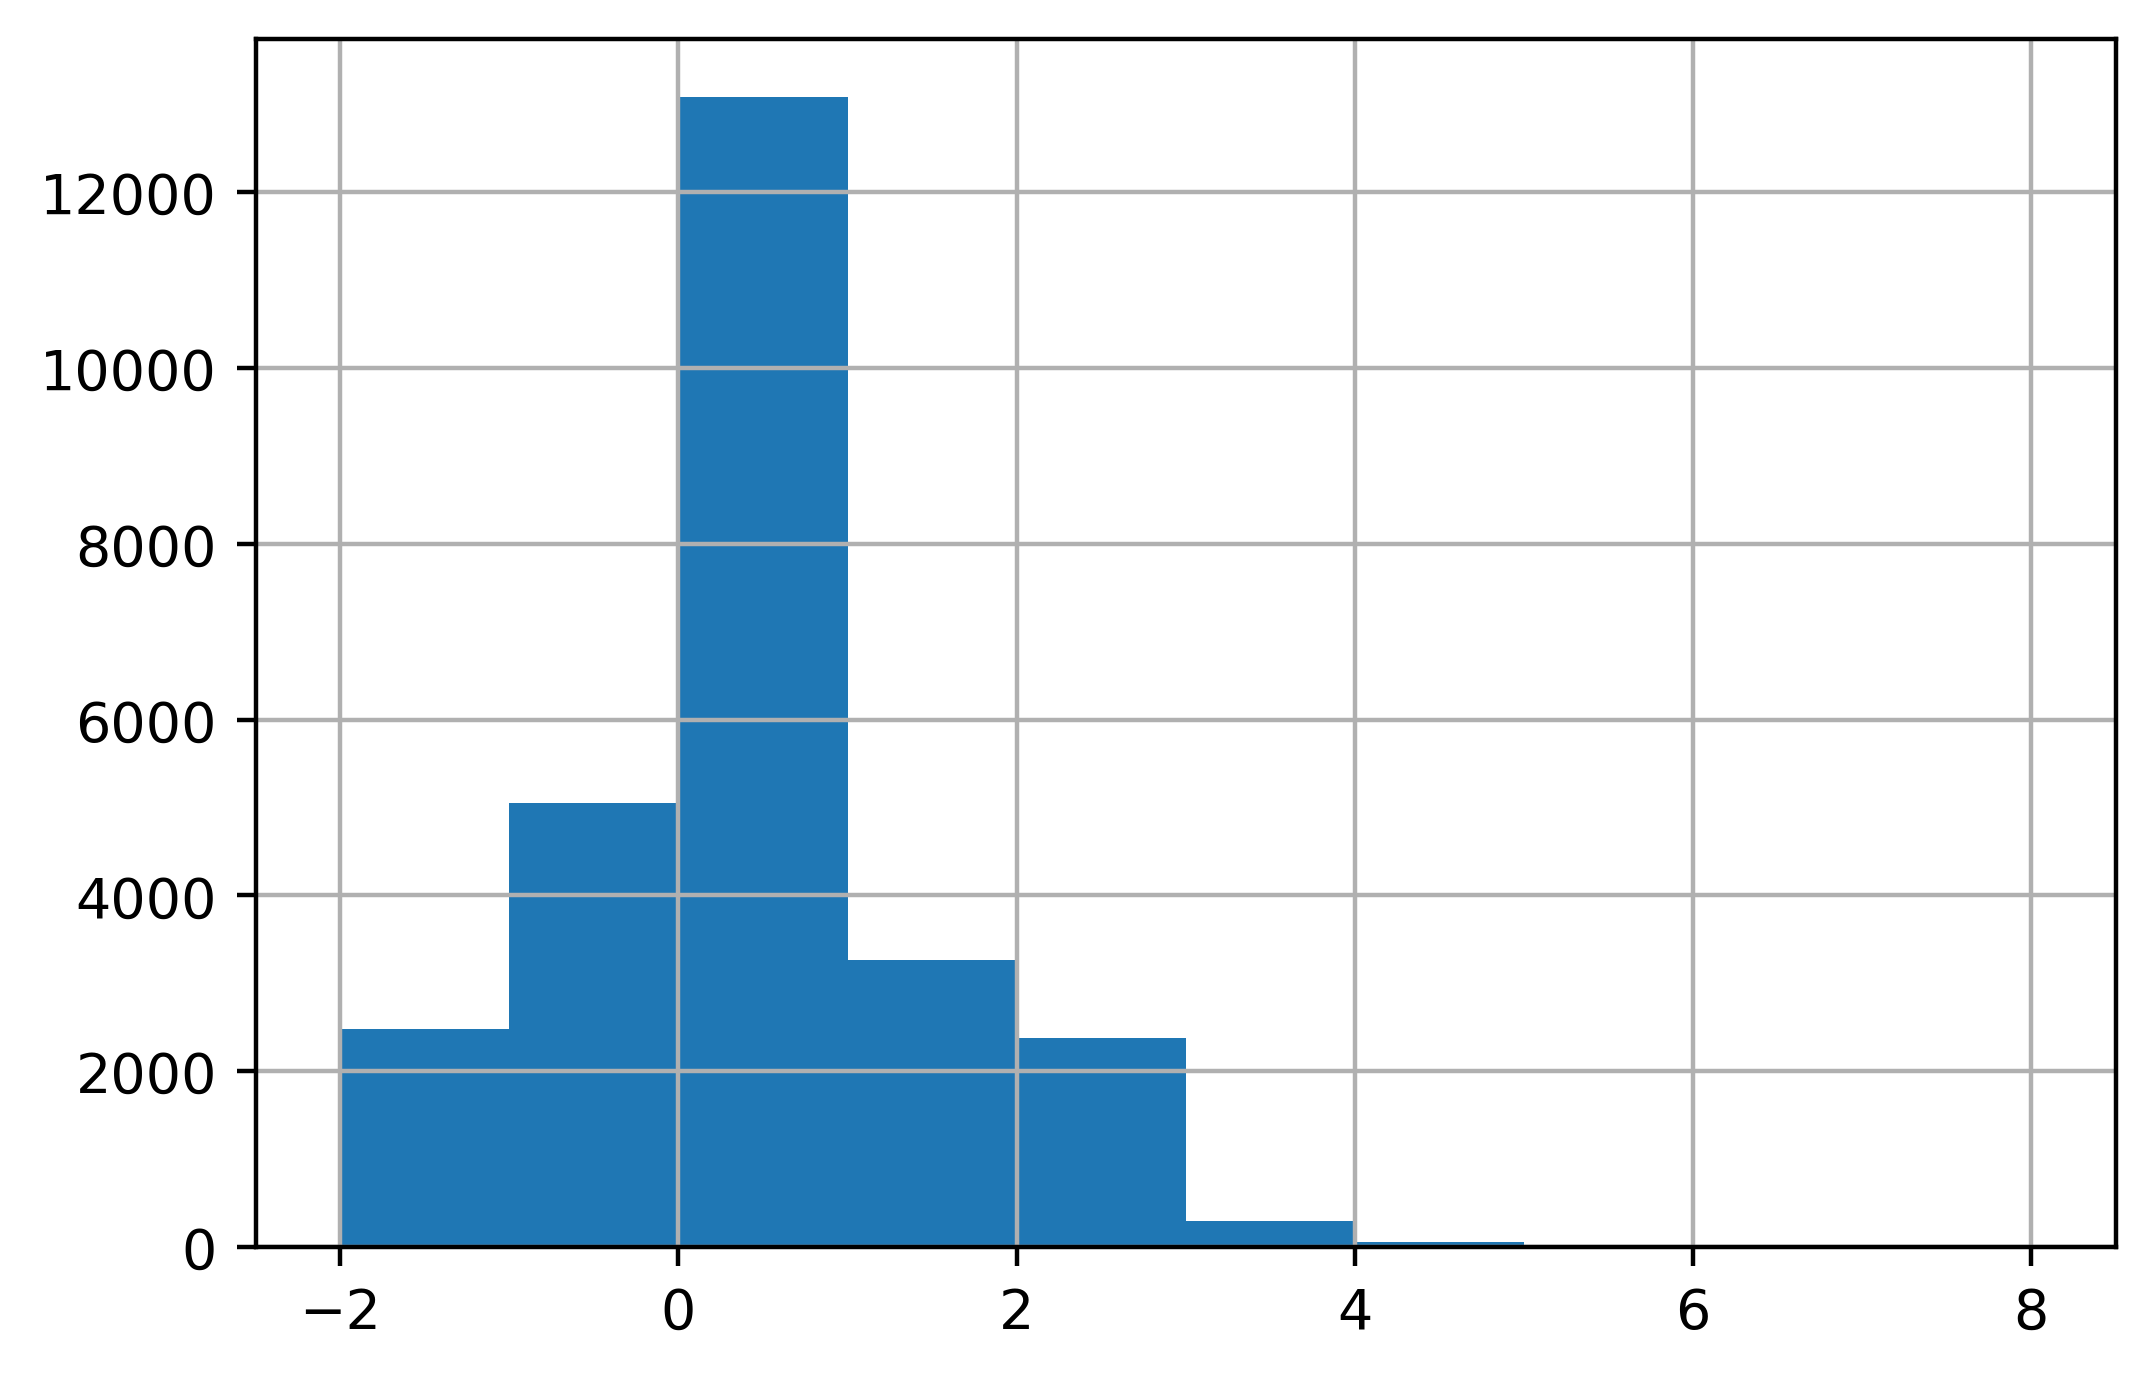

In [61]:
# Histogram of PAY_1
df[pay_feats[0]].hist()

In [62]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

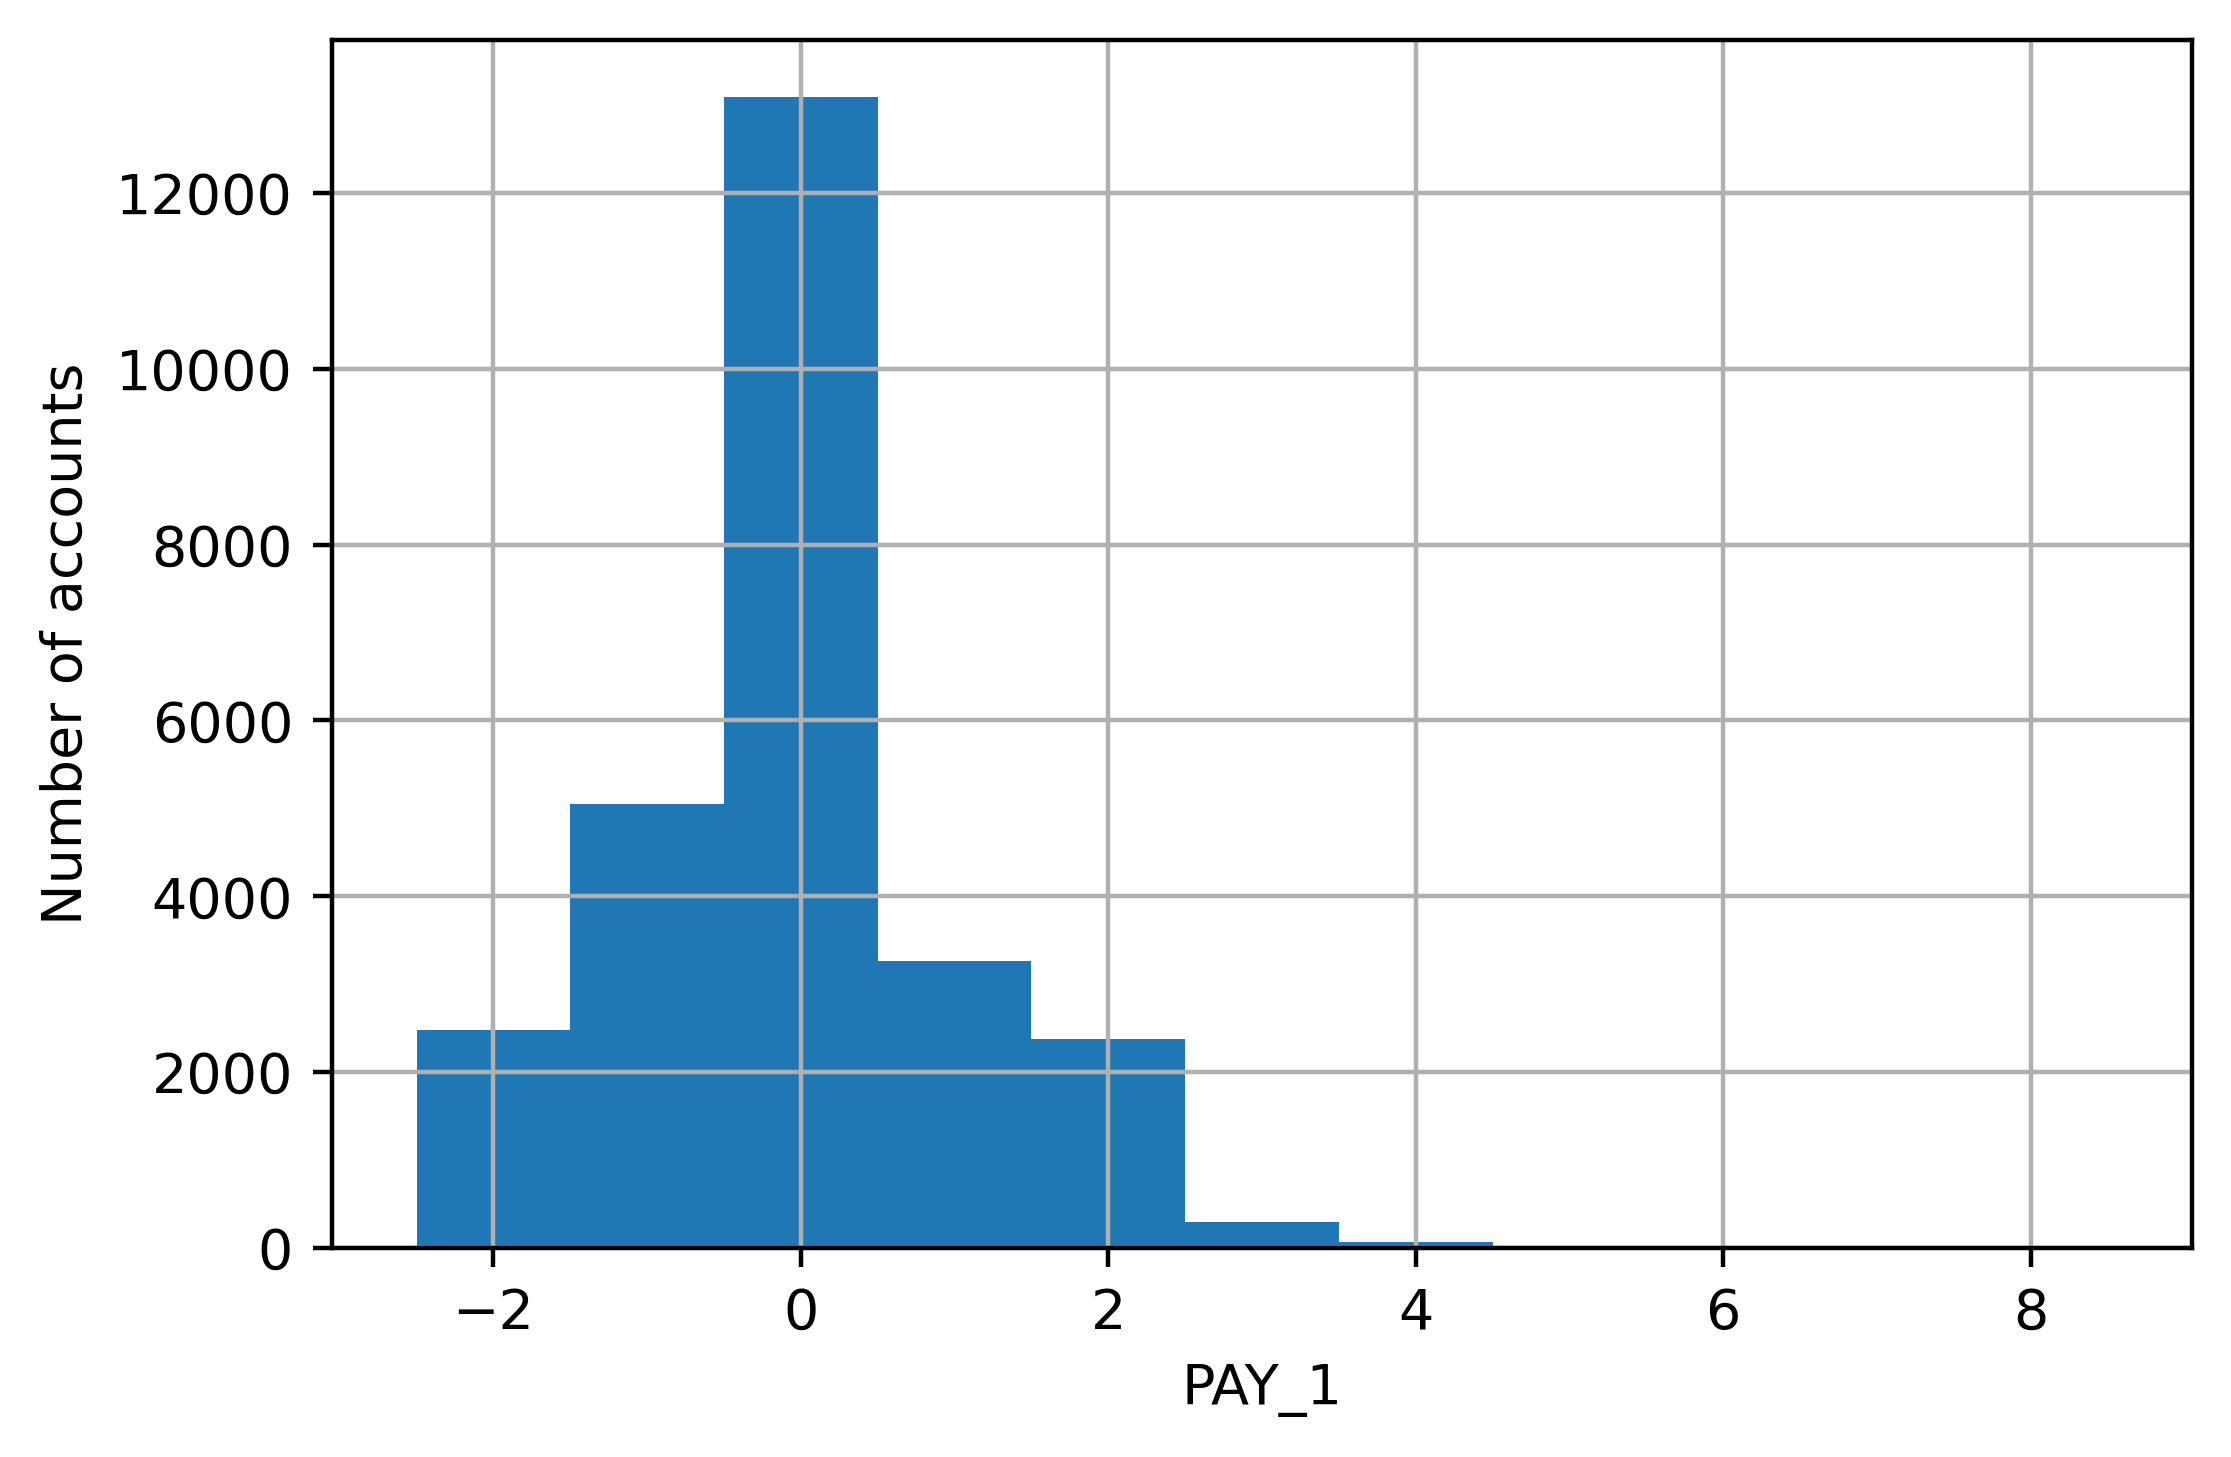

In [63]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC0723ACF8>,
      dtype=object)

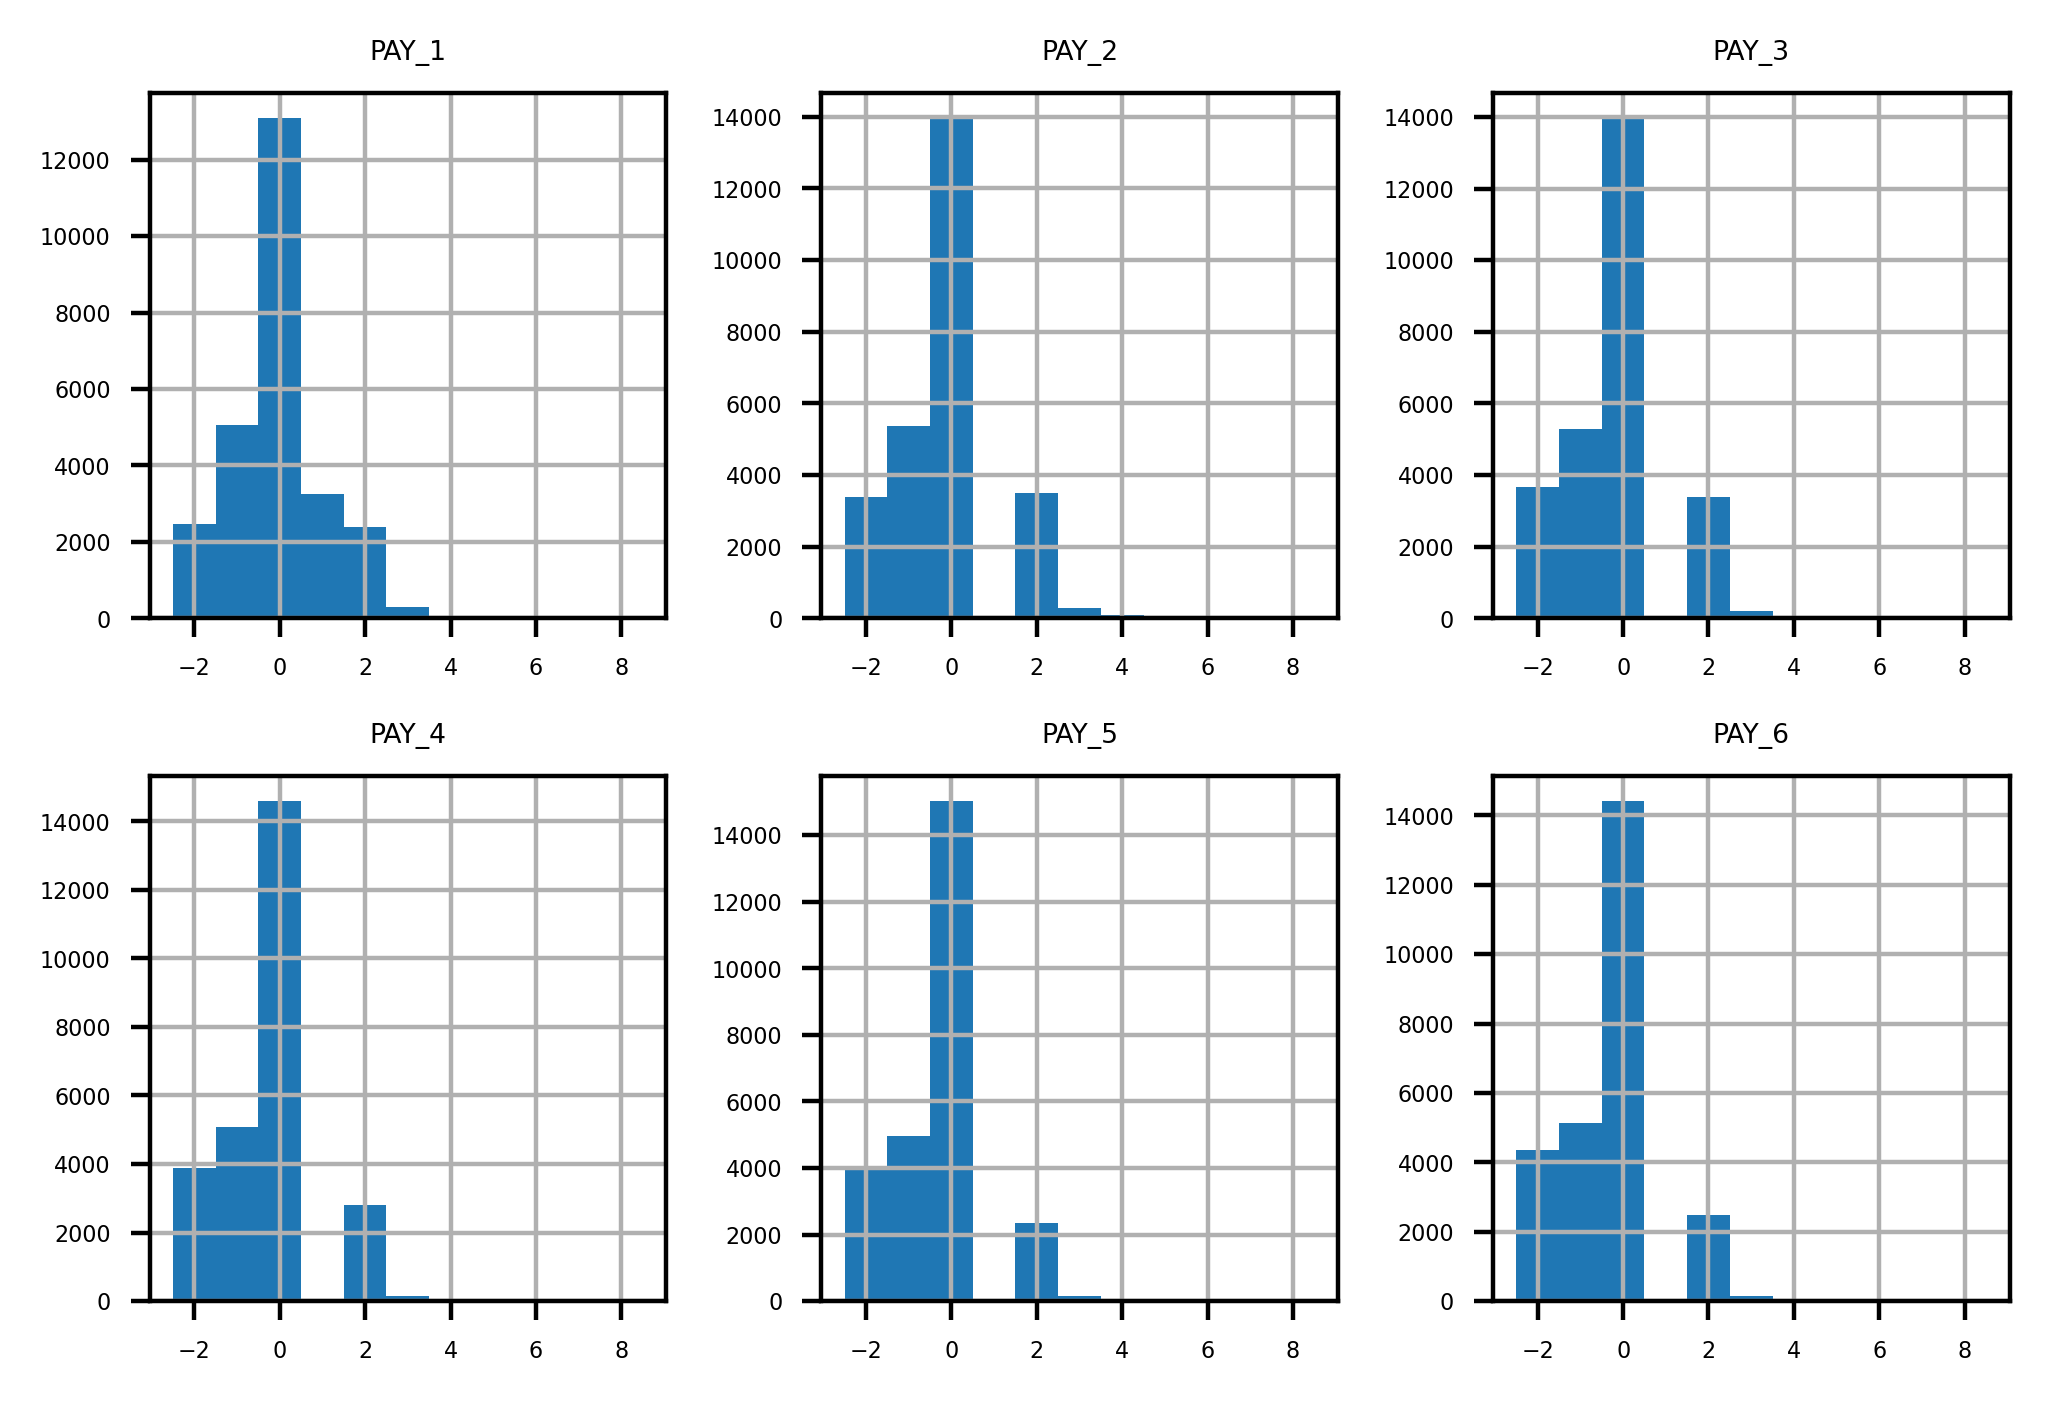

In [64]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

The definitions of the positive integer values of these features, and 
what each feature means. For example, PAY_2 is the repayment status in August, 
PAY_3 is the repayment status in July, and the others go further back in time. A value 
of 1 means a payment delay for 1 month, while a value of 2 means a payment delay 
for 2 months, and so forth.

Did you notice that something doesn't seem right? Consider the values between July 
(PAY_3) and August (PAY_2). In July, there are very few accounts that had a 1-month 
payment delay; this bar is not really visible in the histogram. However, in August, 
there are suddenly thousands of accounts with a 2-month payment delay. This does 
not make sense: the number of accounts with a 2-month delay in a given month 
should be less than or equal to the number of accounts with a 1-month delay in the 
previous month. 


Let's take a closer look at accounts with a 2-month delay in August and see what the 
payment status was in July.

In [65]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [66]:
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures

from scipy import stats
import numpy as np

In [67]:
df = pd.read_csv('./Data/Chapter_1_cleaned_data.csv')

In [68]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [69]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC0948F588>,
      dtype=object)

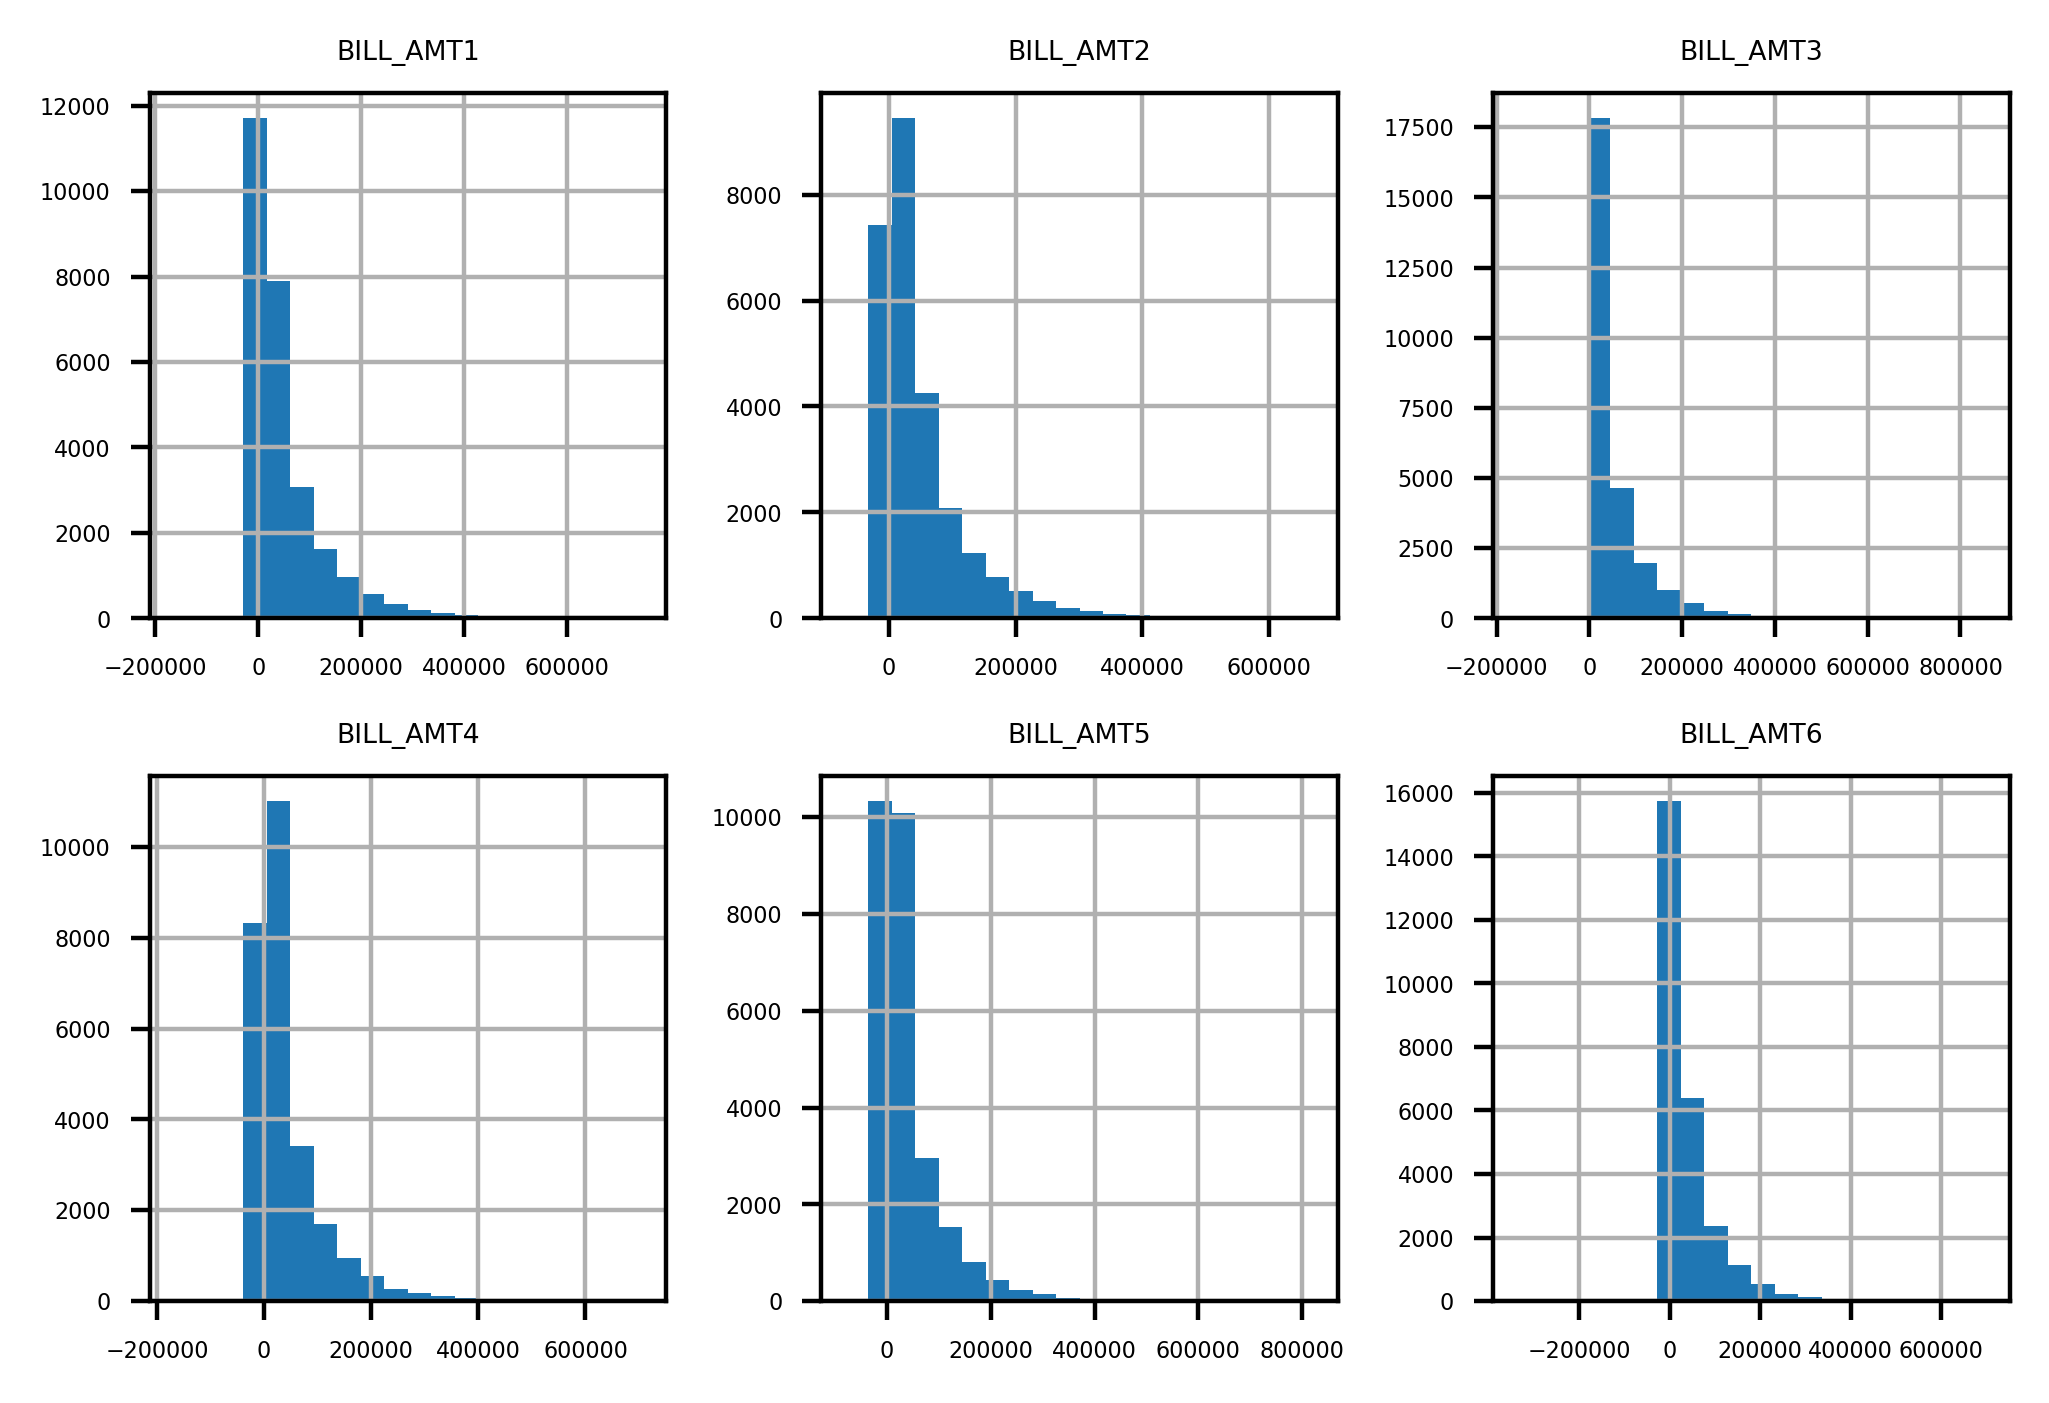

In [70]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [71]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC073FA080>,
      dtype=object)

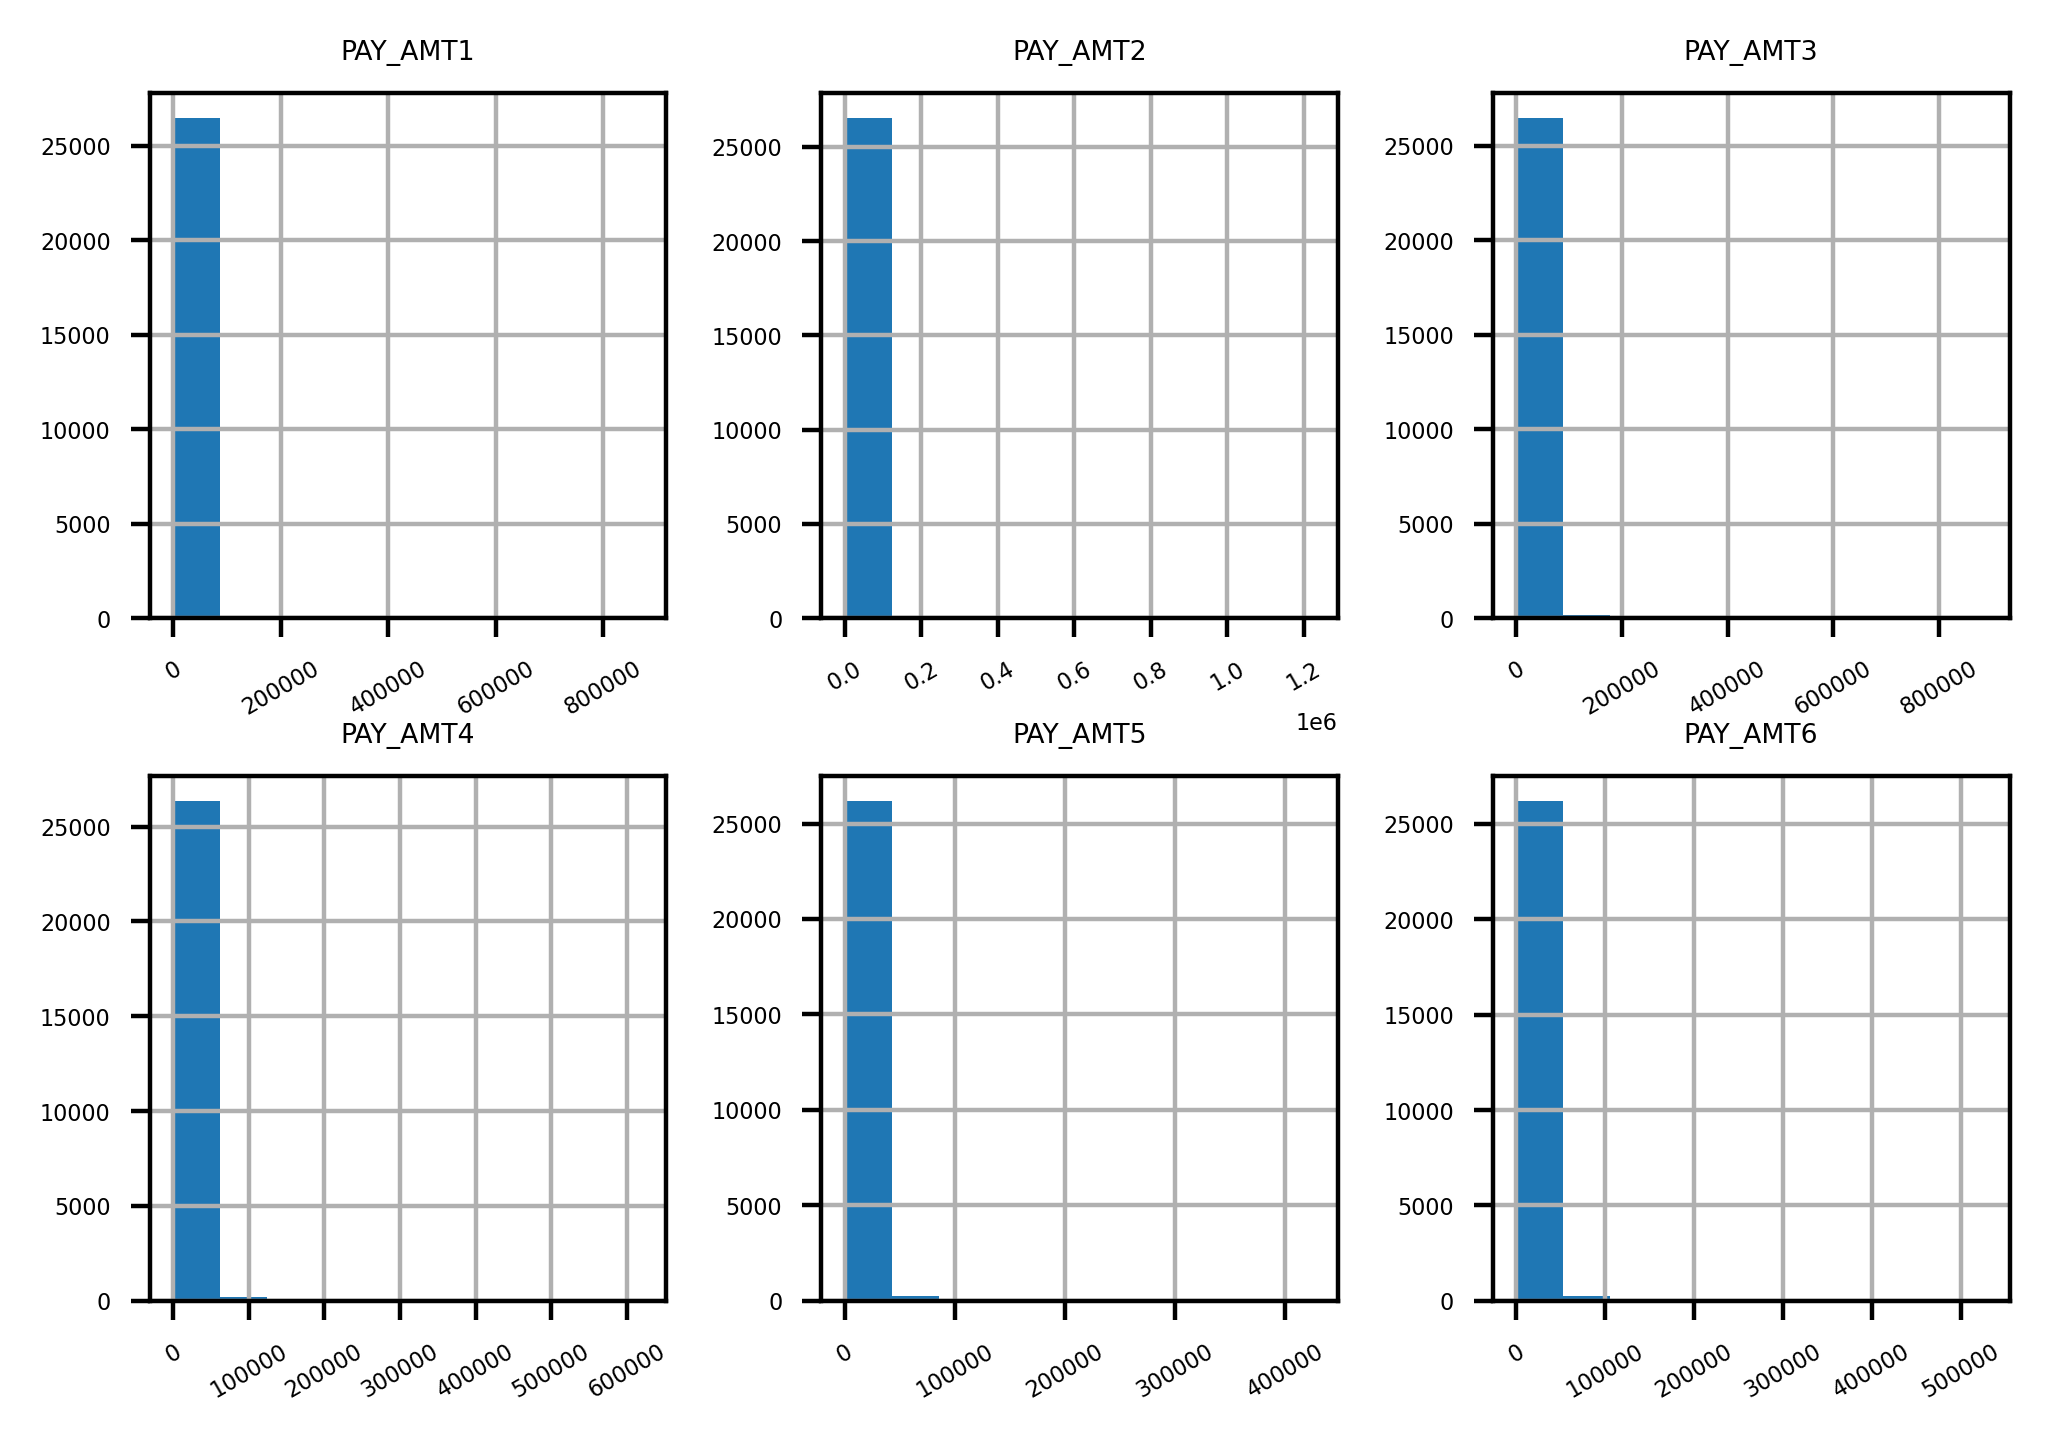

In [72]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [73]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [74]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC0951B7F0>,
      dtype=object)

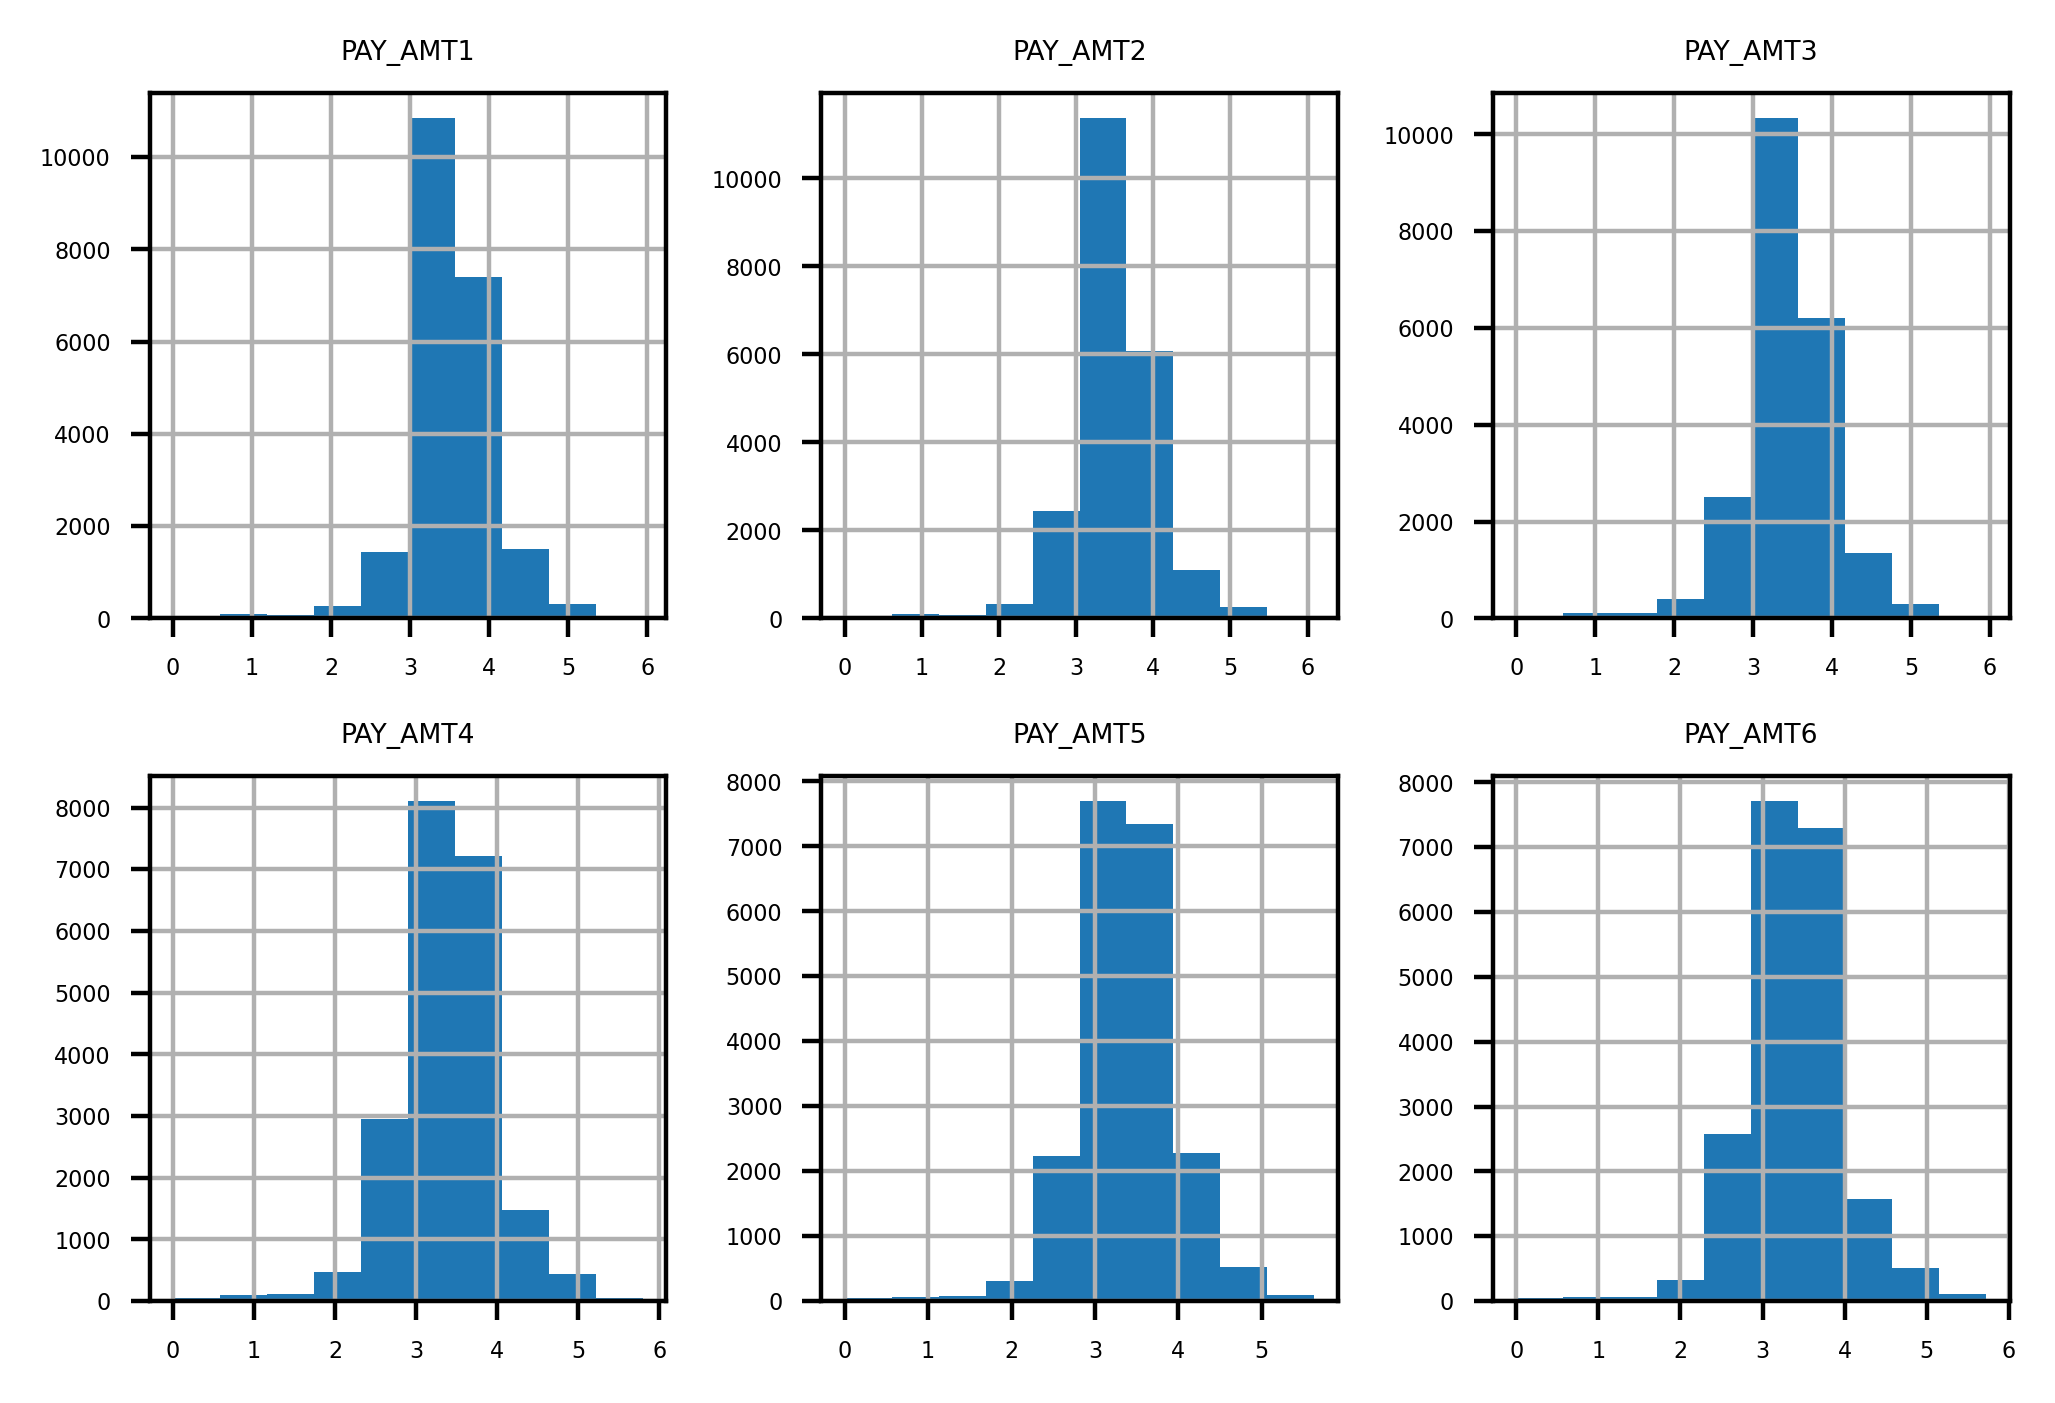

In [75]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

## Exploring the Response Variable and Concluding the Initial Exploration

After exploring the response variable of the case study data, this chapter 
introduces the core functionality of scikit-learn for training models and 
making predictions, through simple use cases of logistic and linear 
regression. Evaluation metrics for binary classification models, including 
true and false positive rates, the confusion matrix, the receiver 
operating characteristic (ROC) curve, and the precision-recall curve

In [76]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figure

In [78]:
df = pd.read_csv('./Data/Chapter_1_cleaned_data.csv')
df['default payment next month'].mean()

0.2217971797179718

In [79]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In practice, real data is rarely balanced. Consequently, there are several 
methods geared toward dealing with imbalanced data. These include the following:

• <b>Undersampling</b> the majority class: Randomly throwing out samples from the 
majority class until the class fractions are equal, or at least less imbalanced.

• <b>Oversampling</b> the minority class: Randomly adding duplicate samples of the 
minority class to achieve the same goal.

• <b>Weighting samples: </b> This method is performed as part of the training step, so 
the minority class collectively has as much "emphasis" as the majority class in the 
trained model. The effect of this is similar to oversampling.

• More sophisticated methods, such as Synthetic Minority <b>Over-sampling 
Technique (SMOTE).</b>

• Is the data <b>complete</b>?

Are there missing values or other anomalies?

• Is the data <b>consistent</b>?

Does the distribution change over time, and if so, is this expected?

• Does the data <b>make sense</b>?

Do the values of the features fit with their definition in the data dictionary?

In [84]:
my_new_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [85]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [86]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X


array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [87]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [89]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [90]:
my_new_lr.predict(new_X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating Synthetic Data

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [94]:
np.mean(y_train)

0.223102526838873

In [95]:
np.mean(y_test)

0.21657603600225014

In [96]:
my_new_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
my_new_lr.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [99]:
y_pred=my_new_lr.predict(X_test)
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [100]:
my_new_lr.score(X_test, y_test)

0.7834239639977498

In [101]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [102]:
P = sum(y_test)
P

1155

In [103]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [104]:
TPR = TP/P
TPR

0.0

In [105]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [106]:
FNR = FN/P
FNR

1.0

In [107]:
N = sum(y_test==0)
N

4178

In [108]:
TN = sum((y_test==0) & (y_pred==0))
TN

4178

In [109]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [112]:
TNR = TN / N
FPR = FP / N

print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [113]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

TPR is also called <b>recall</b> and <b>sensitivity</b>.

<b>Precision:</b> this is the proportion of positive predictions that are correct (as opposed to the proportion of positive samples that are correctly predicted)

In [115]:
y_pred_proba = my_new_lr.predict_proba(X_test)
y_pred_proba

array([[0.77461103, 0.22538897],
       [0.77461103, 0.22538897],
       [0.79035206, 0.20964794],
       ...,
       [0.79035206, 0.20964794],
       [0.79035206, 0.20964794],
       [0.79035206, 0.20964794]])

In [116]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [117]:
np.unique(prob_sum)

array([1.])

In [118]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22538897, 0.22538897, 0.20964794, ..., 0.20964794, 0.20964794,
       0.20964794])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20964794, 0.21461521, 0.21958249, 0.22454976, 0.22951704,
        0.23448431, 0.23945159, 0.24441886, 0.24938614, 0.25435341,
        0.25932069]),
 <a list of 10 Patch objects>)

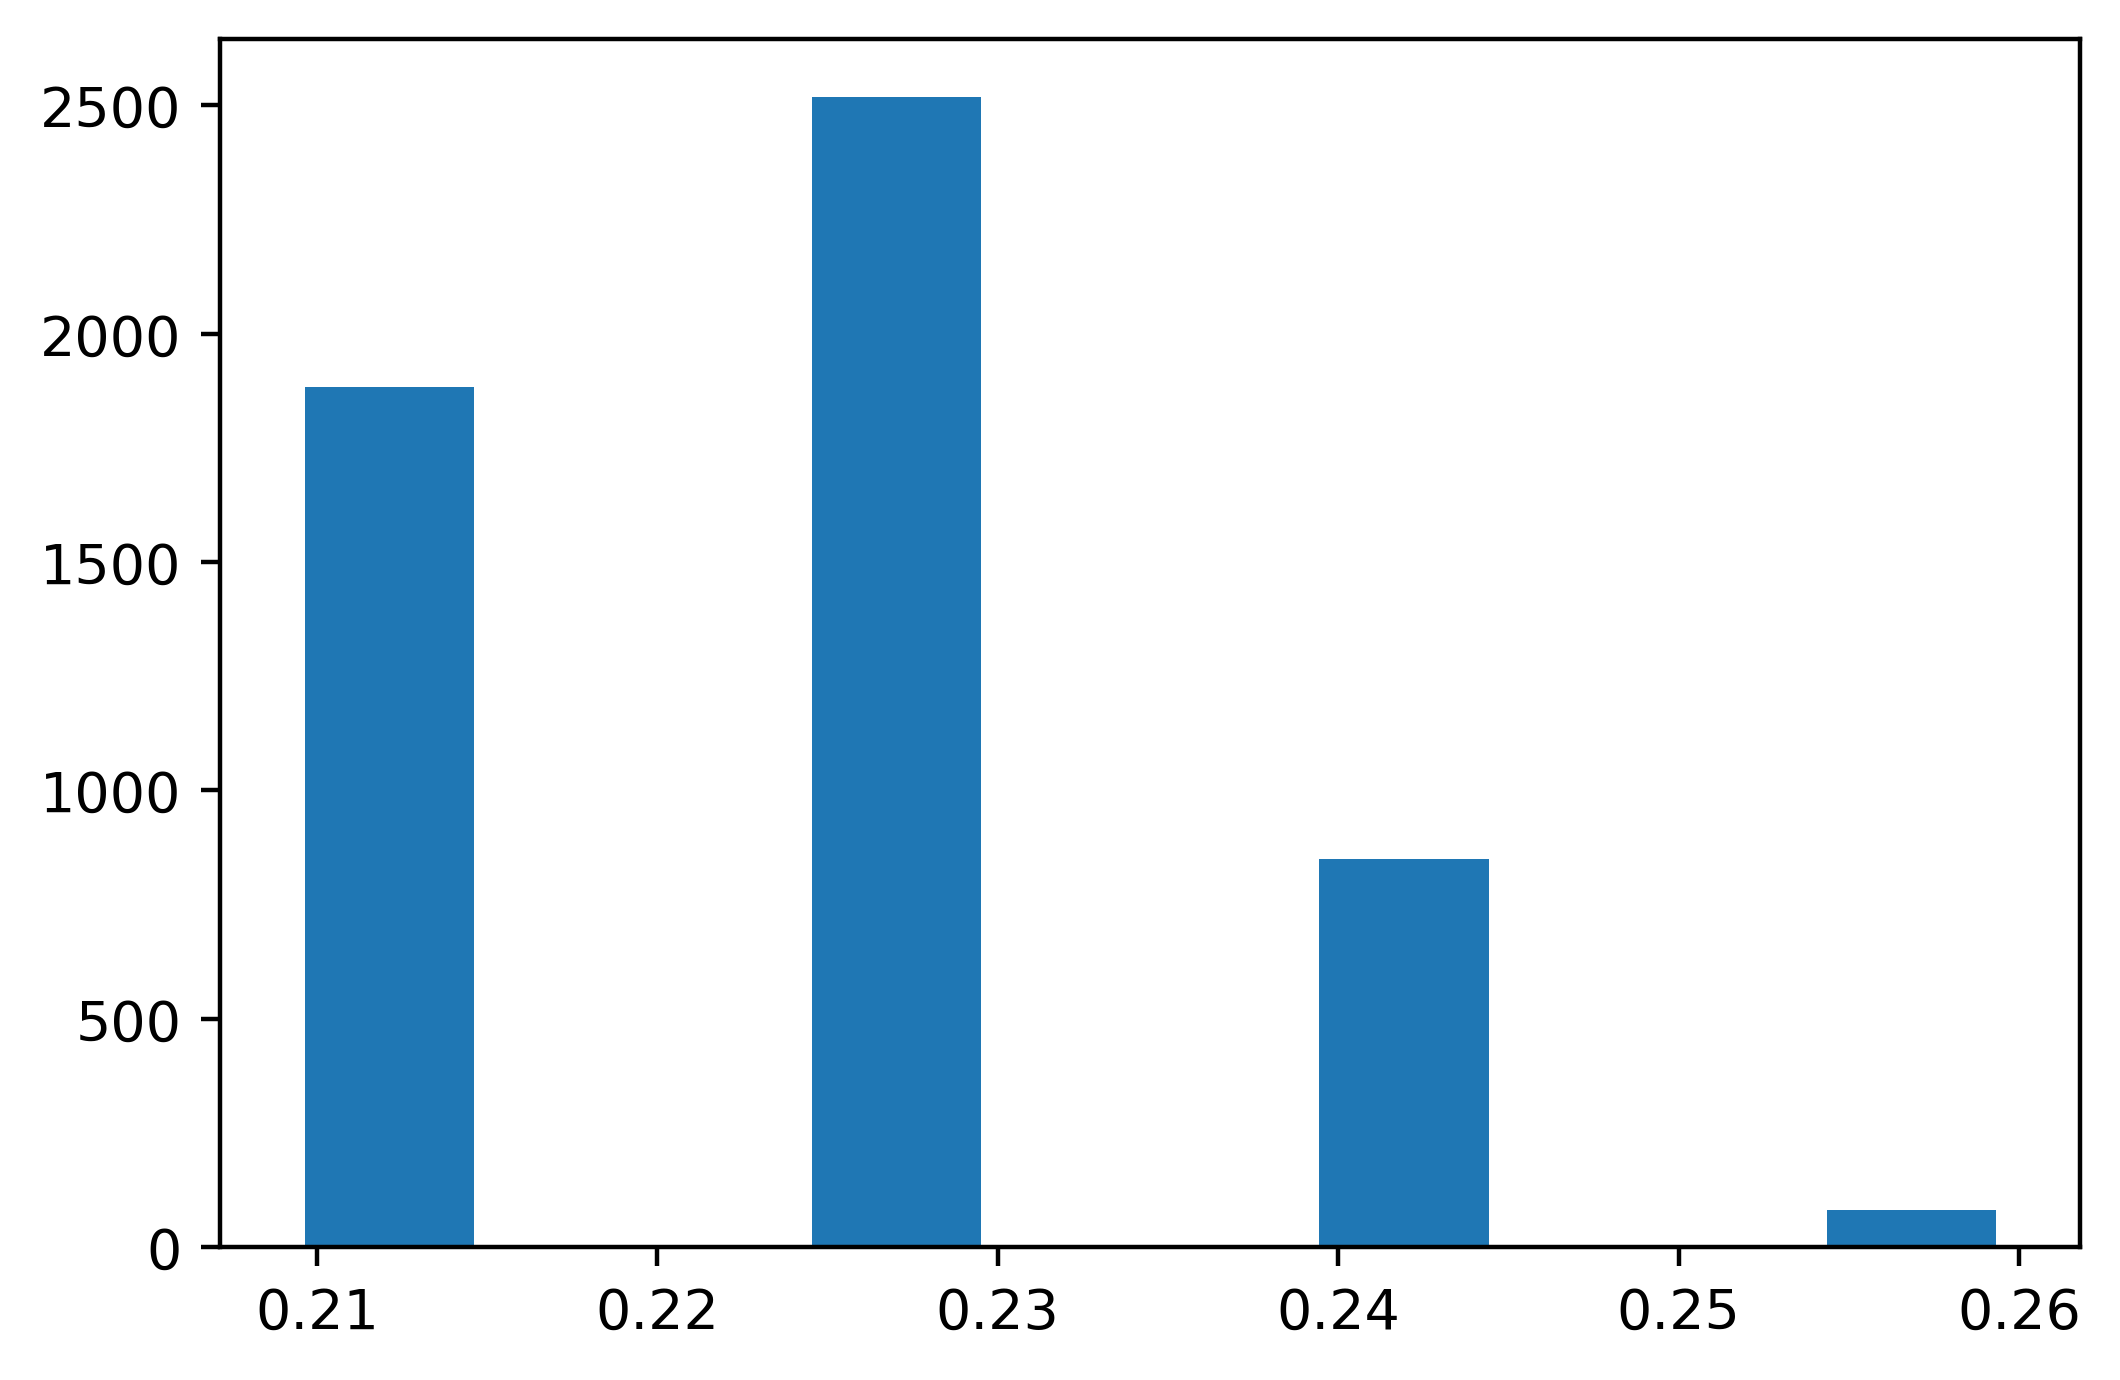

In [119]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

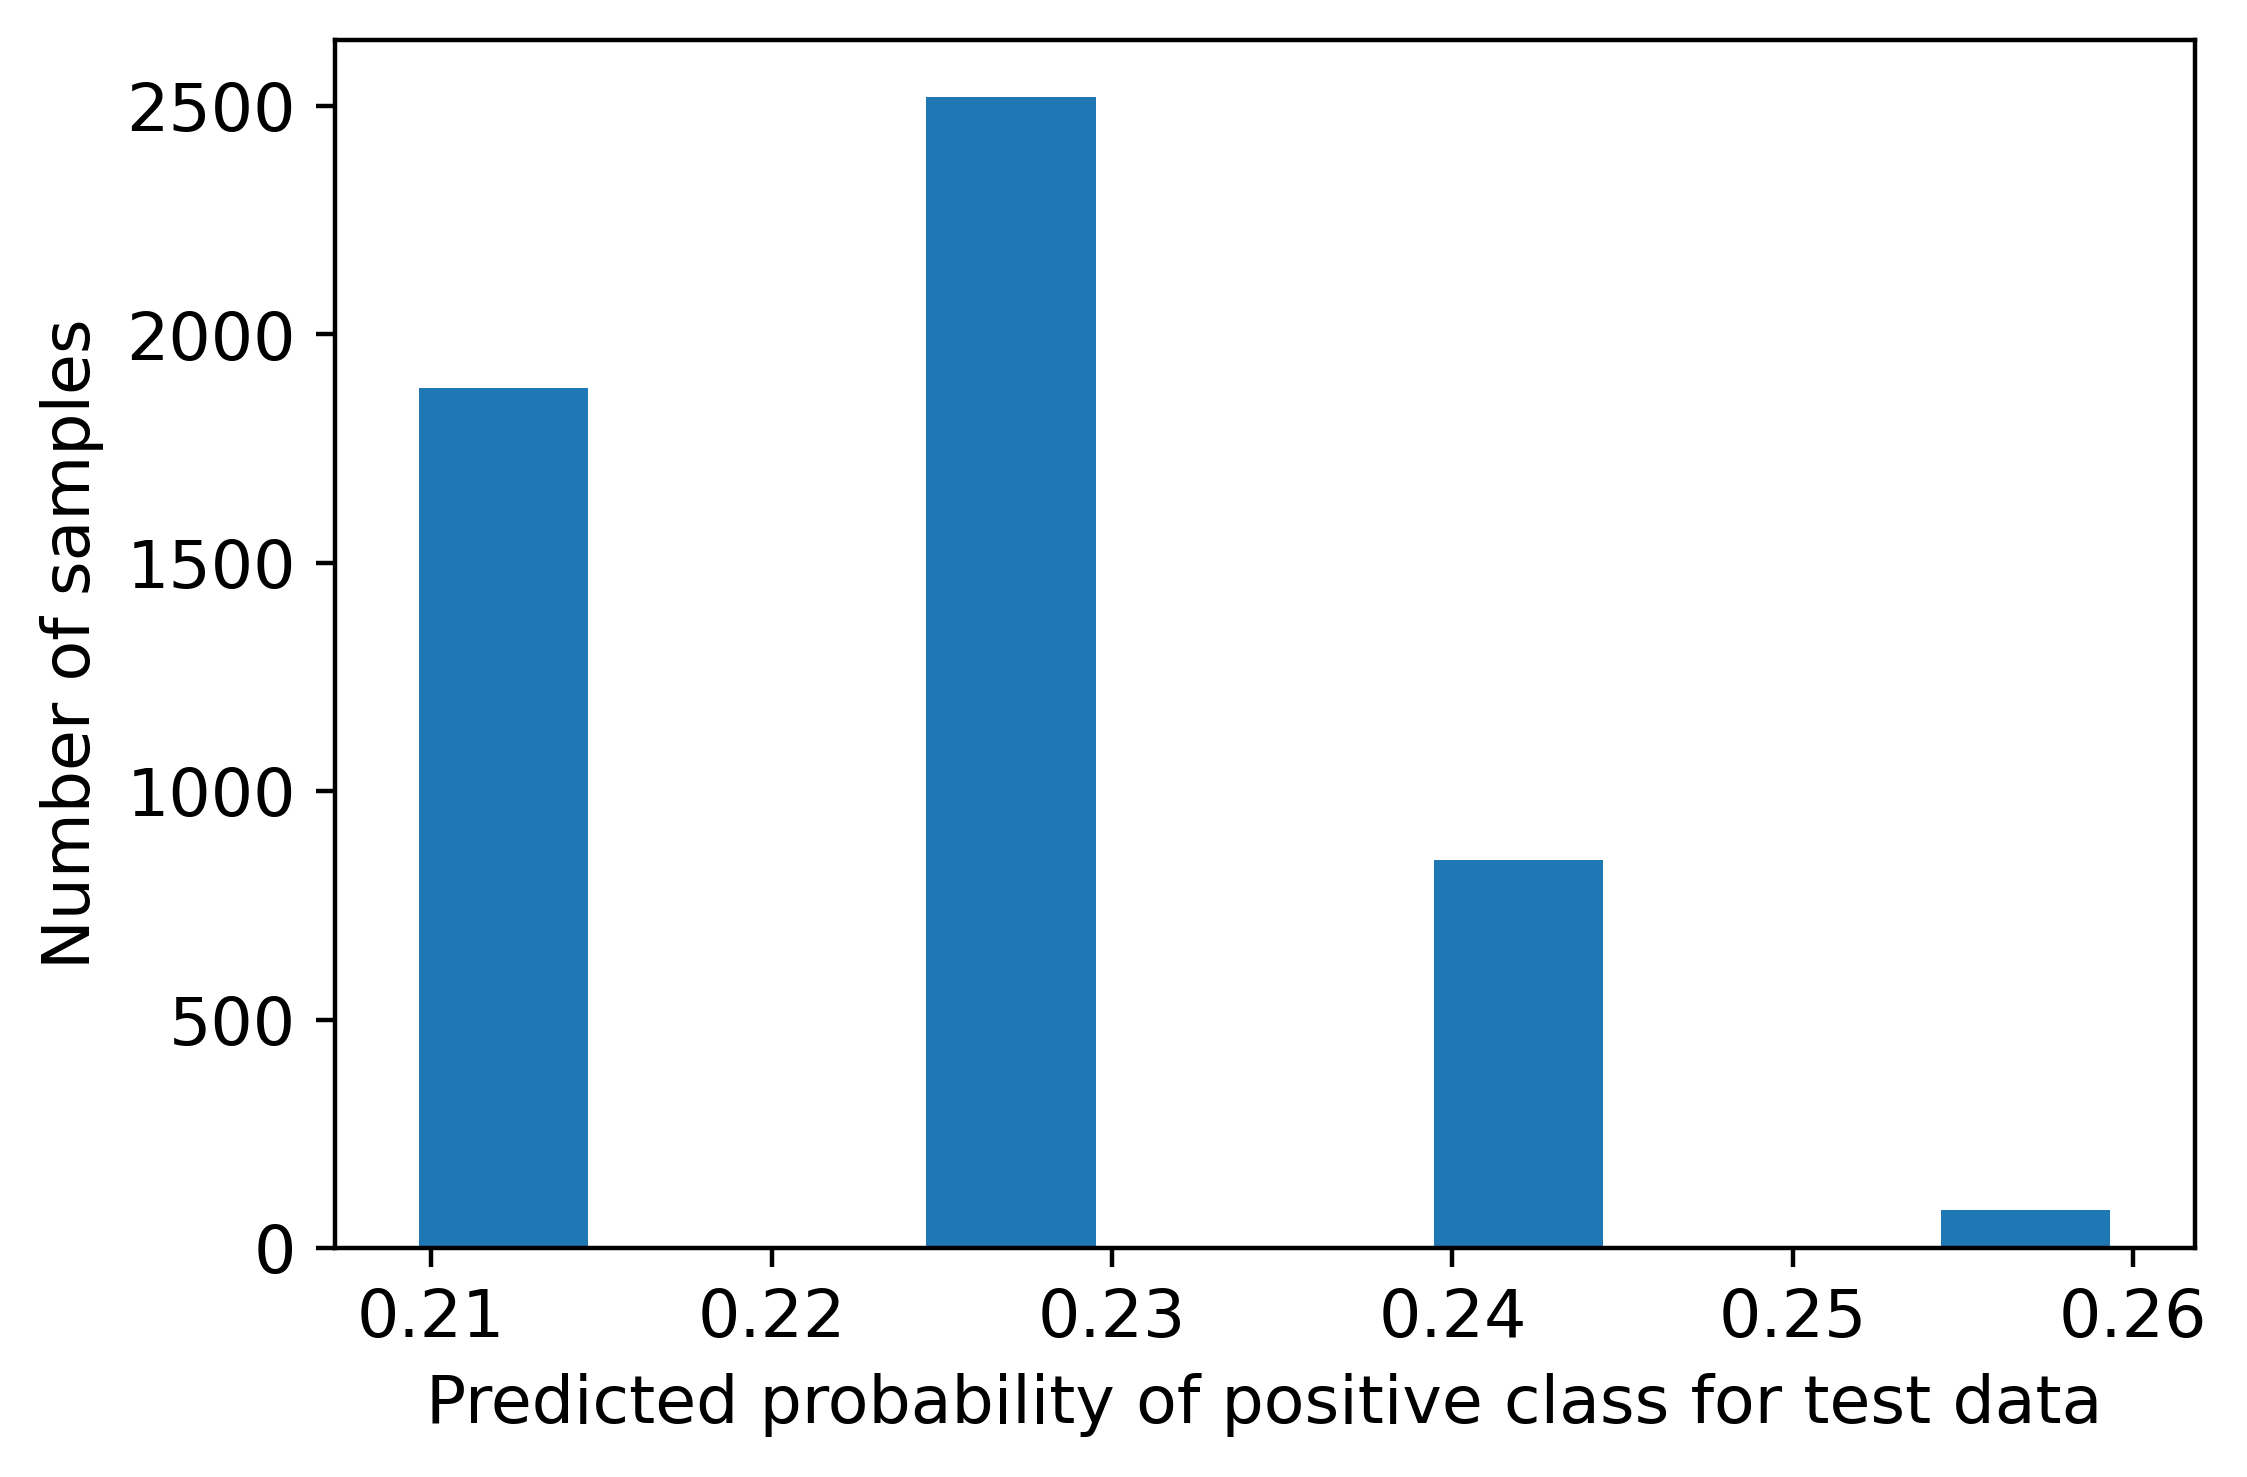

In [120]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class '\
 'for test data')
plt.ylabel('Number of samples')

In [121]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

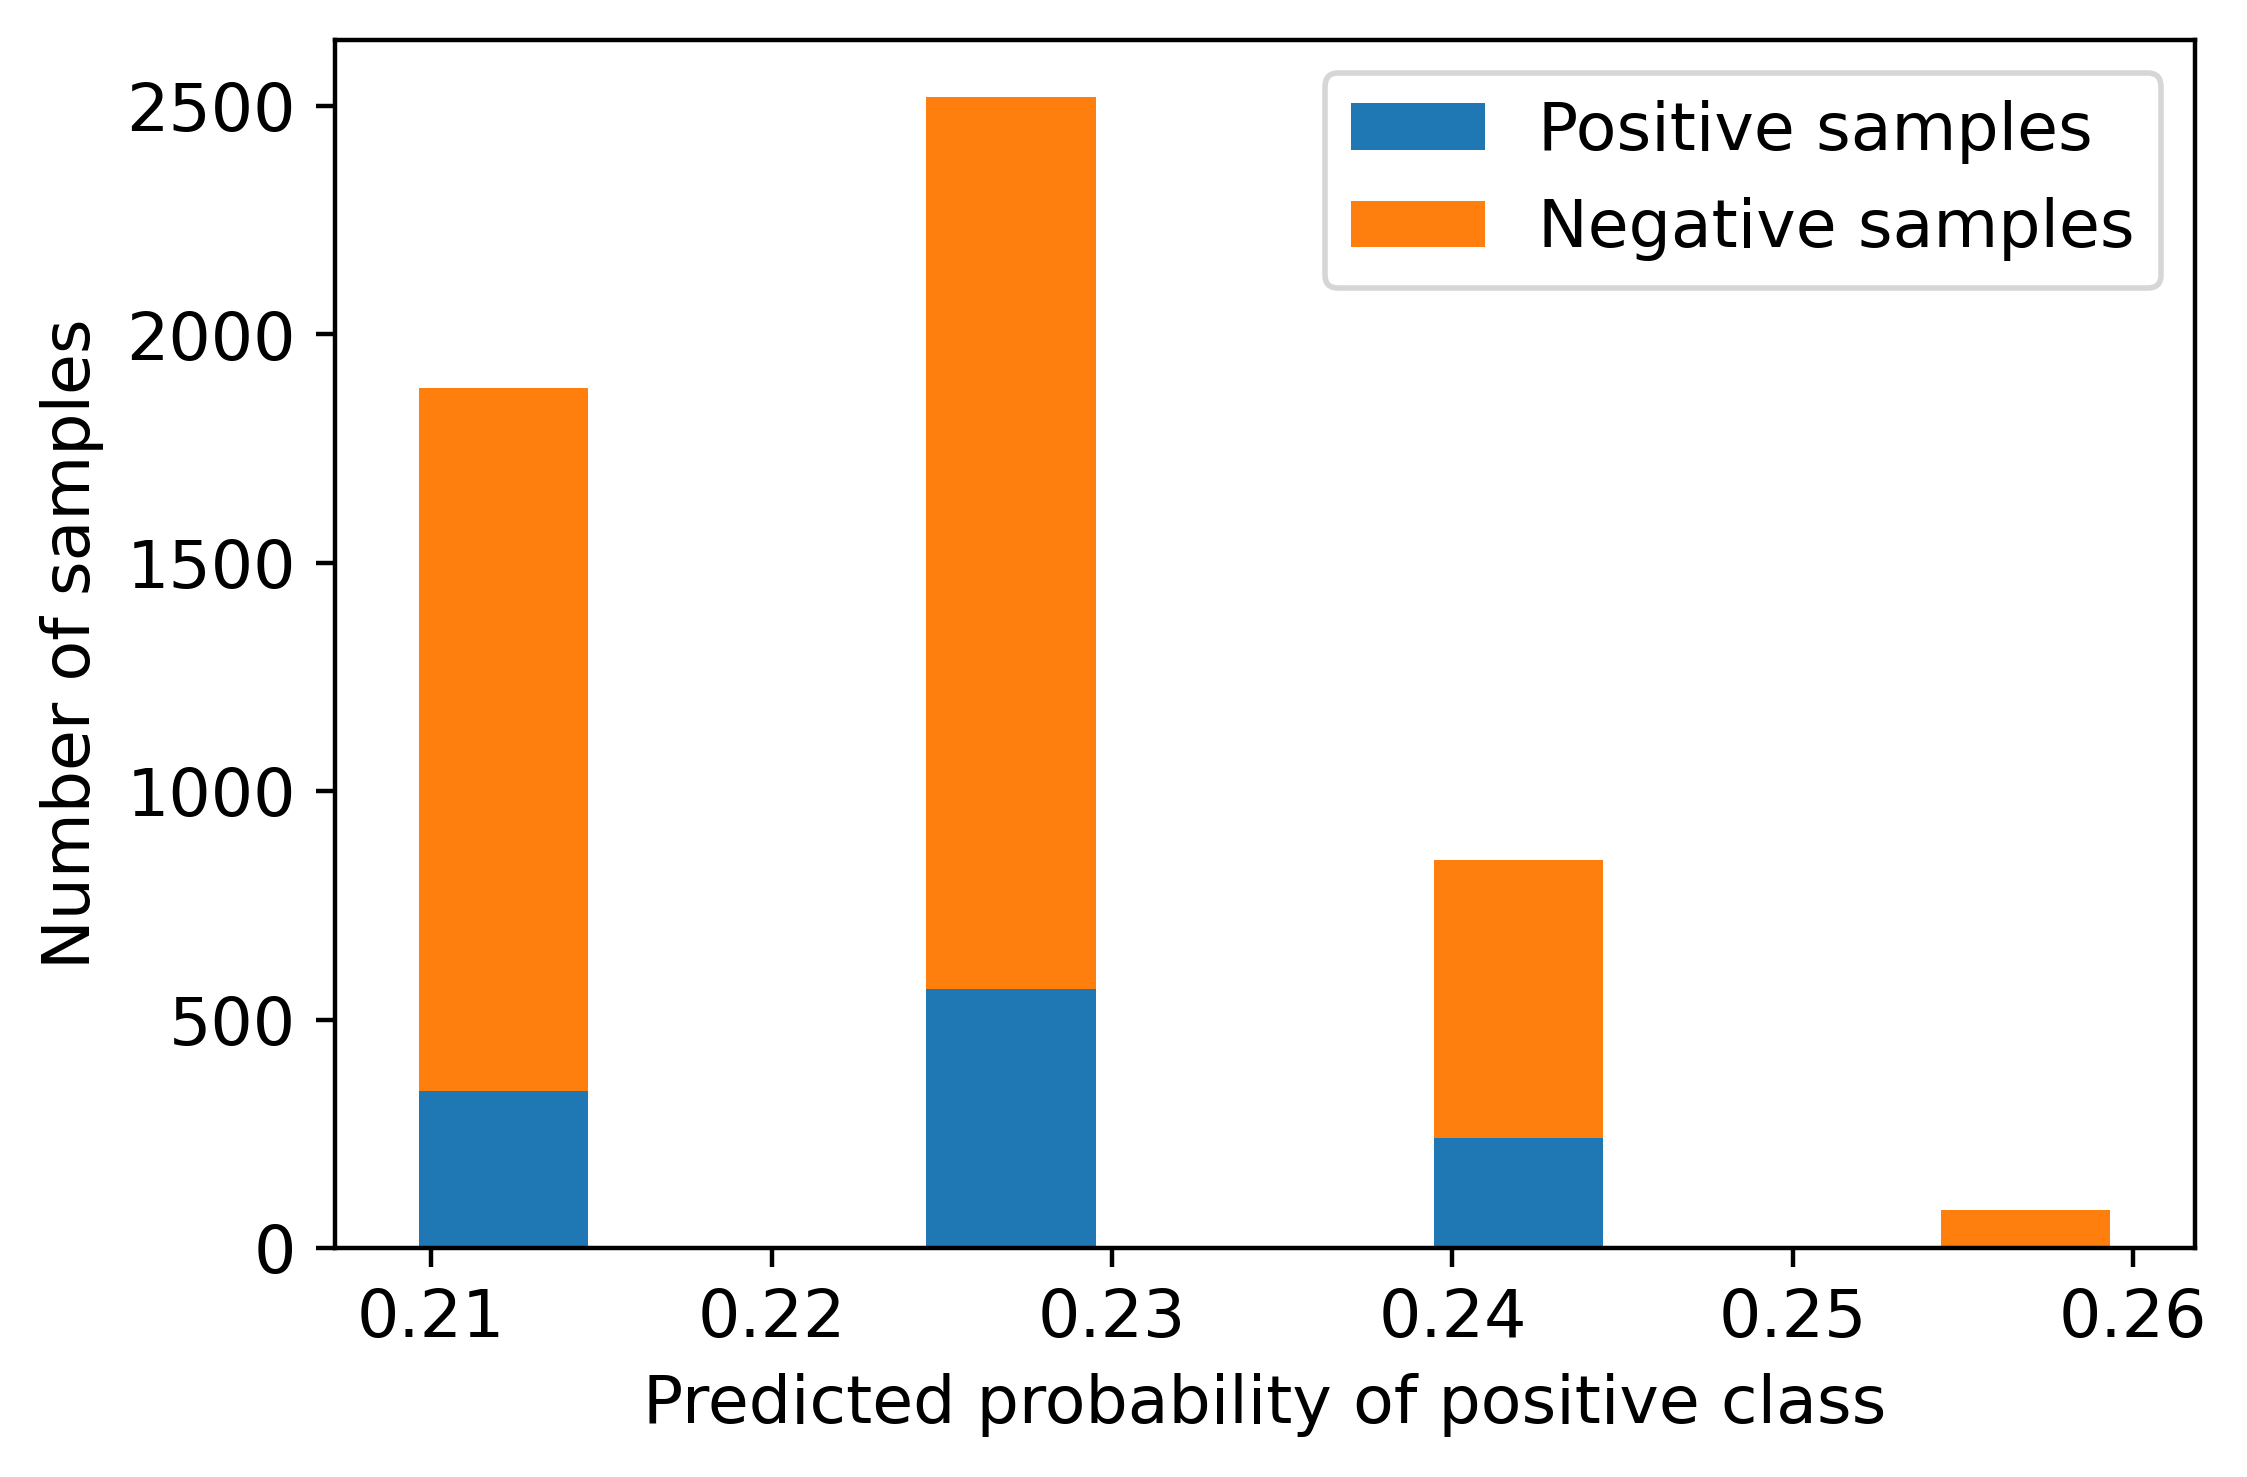

In [122]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],\
 histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

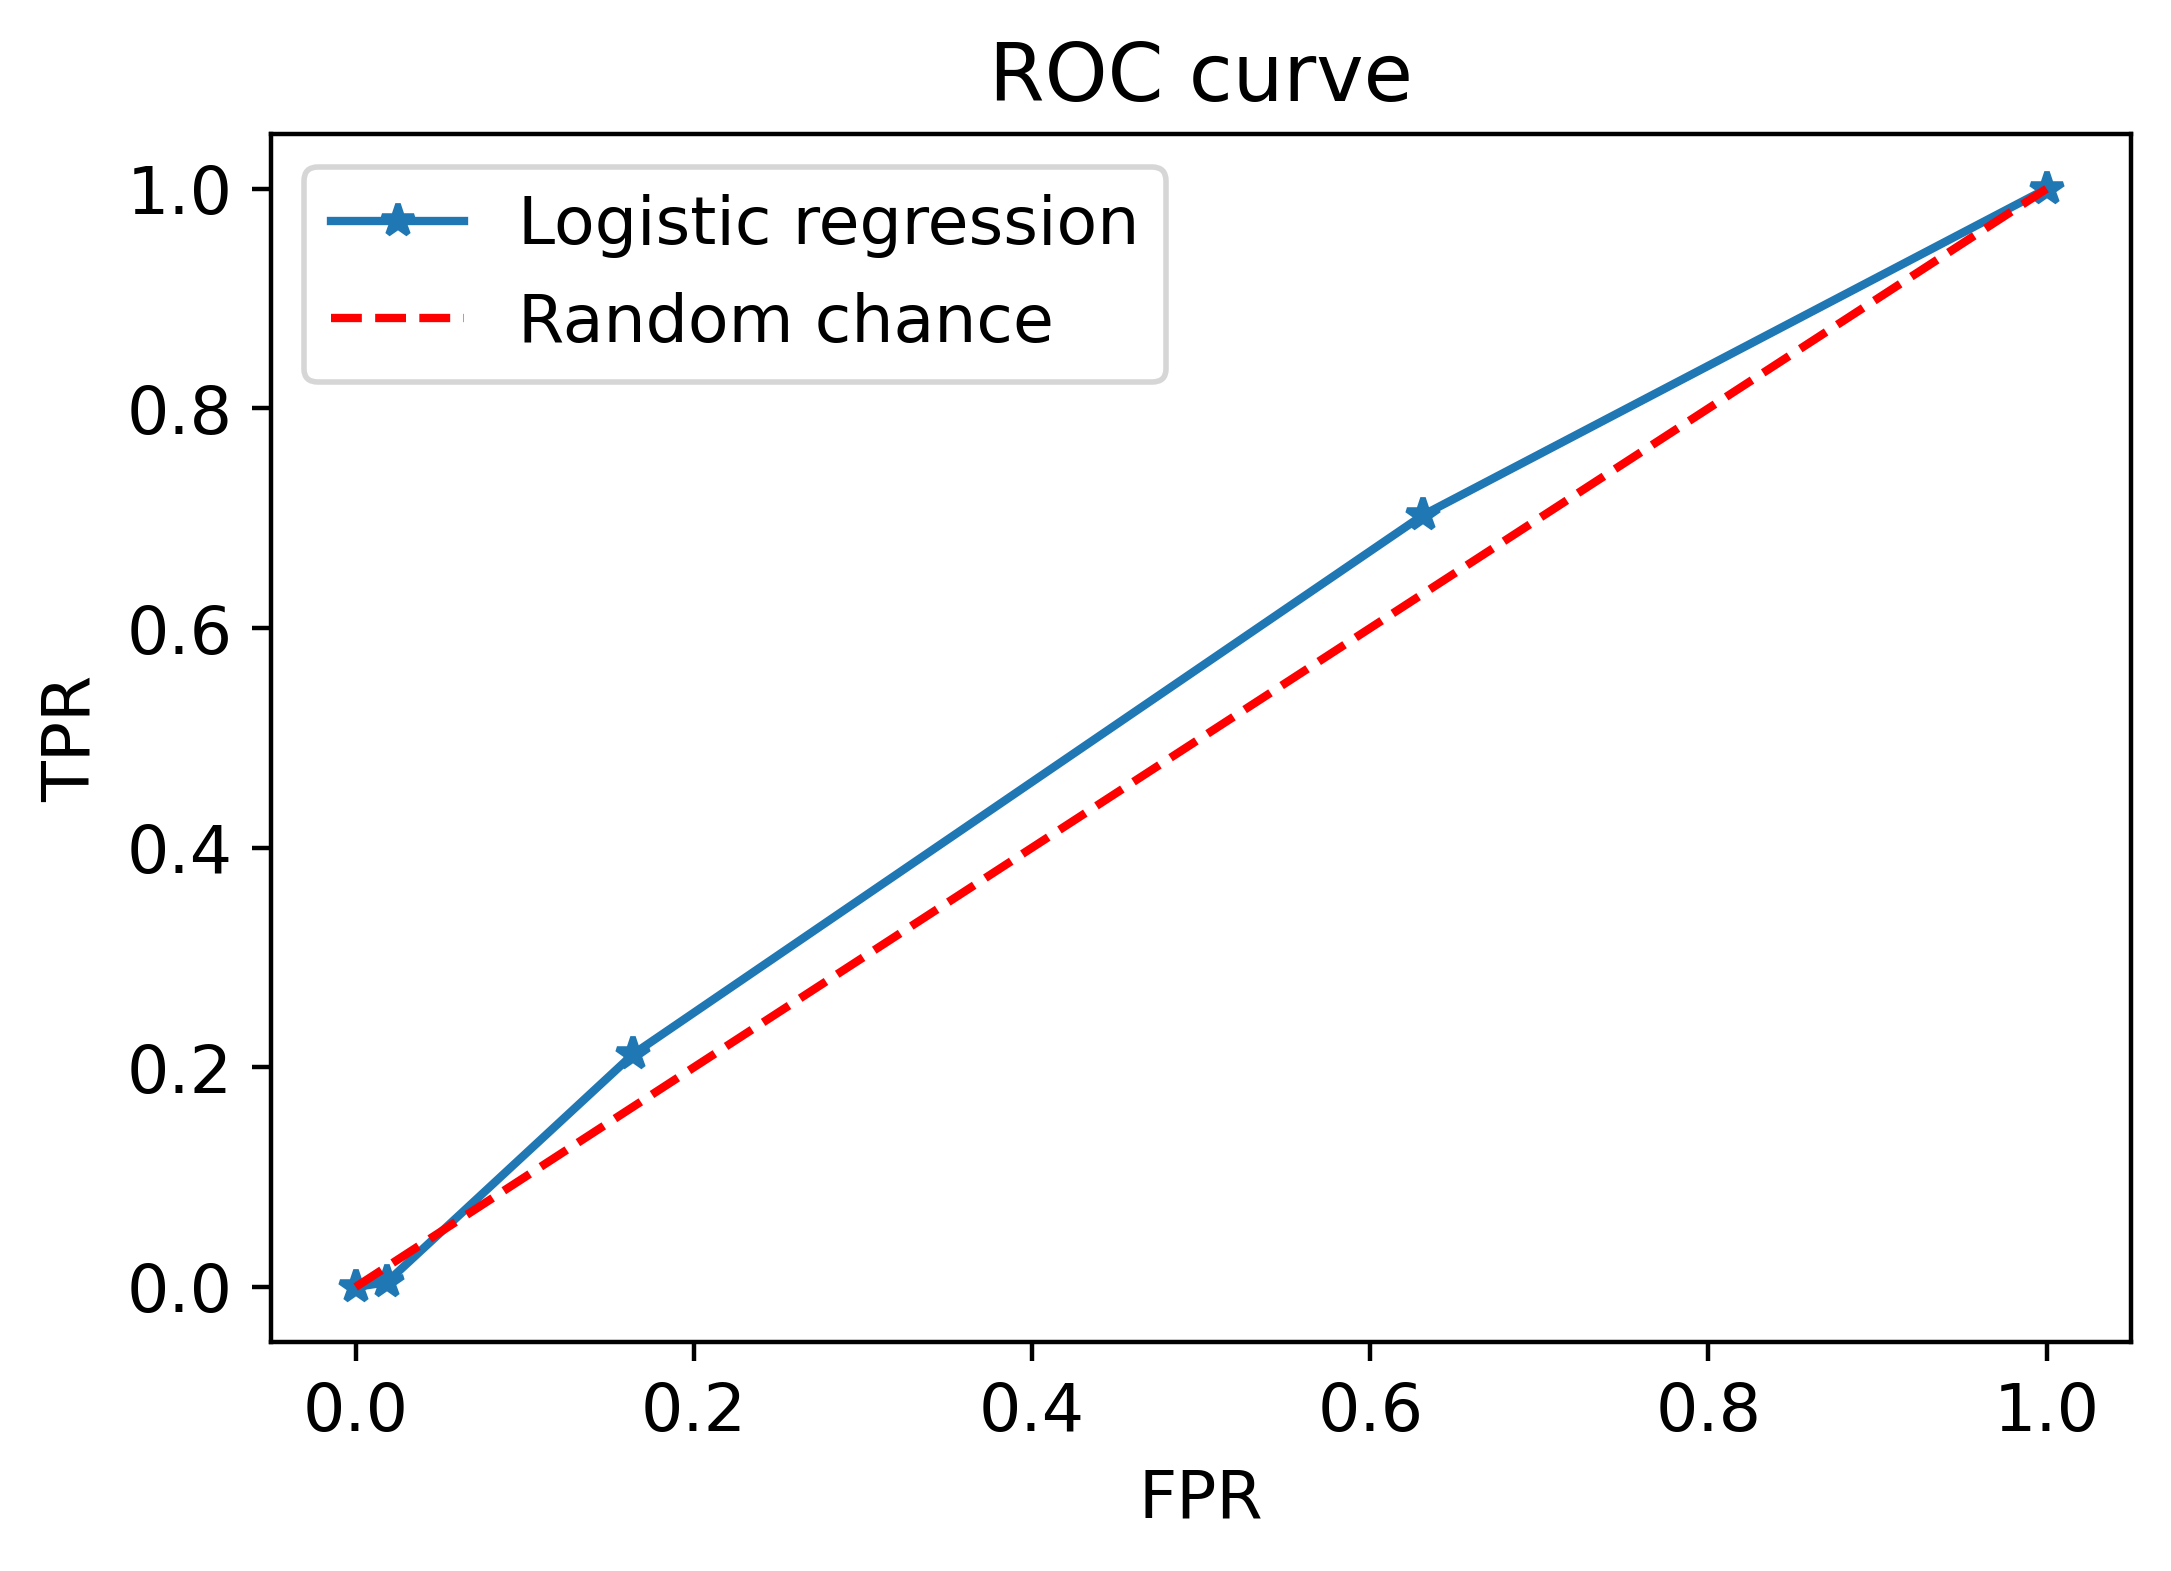

In [123]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [124]:
thresholds

array([1.25932069, 0.25932069, 0.24195008, 0.22538897, 0.20964794])

In [125]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

### Examining the Relationships Between Features and the Response Variable

In [126]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
df = pd.read_csv('./Data/Chapter_1_cleaned_data.csv')

In [127]:
features_response = df.columns.tolist()
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [131]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [133]:
items_to_remove = ['ID', 'SEX',\
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
                   'EDUCATION_CAT',\
 'graduate school', 'high school', 'none',\
                   'others', 'university']

In [134]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [138]:
corr=df[features_response].corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


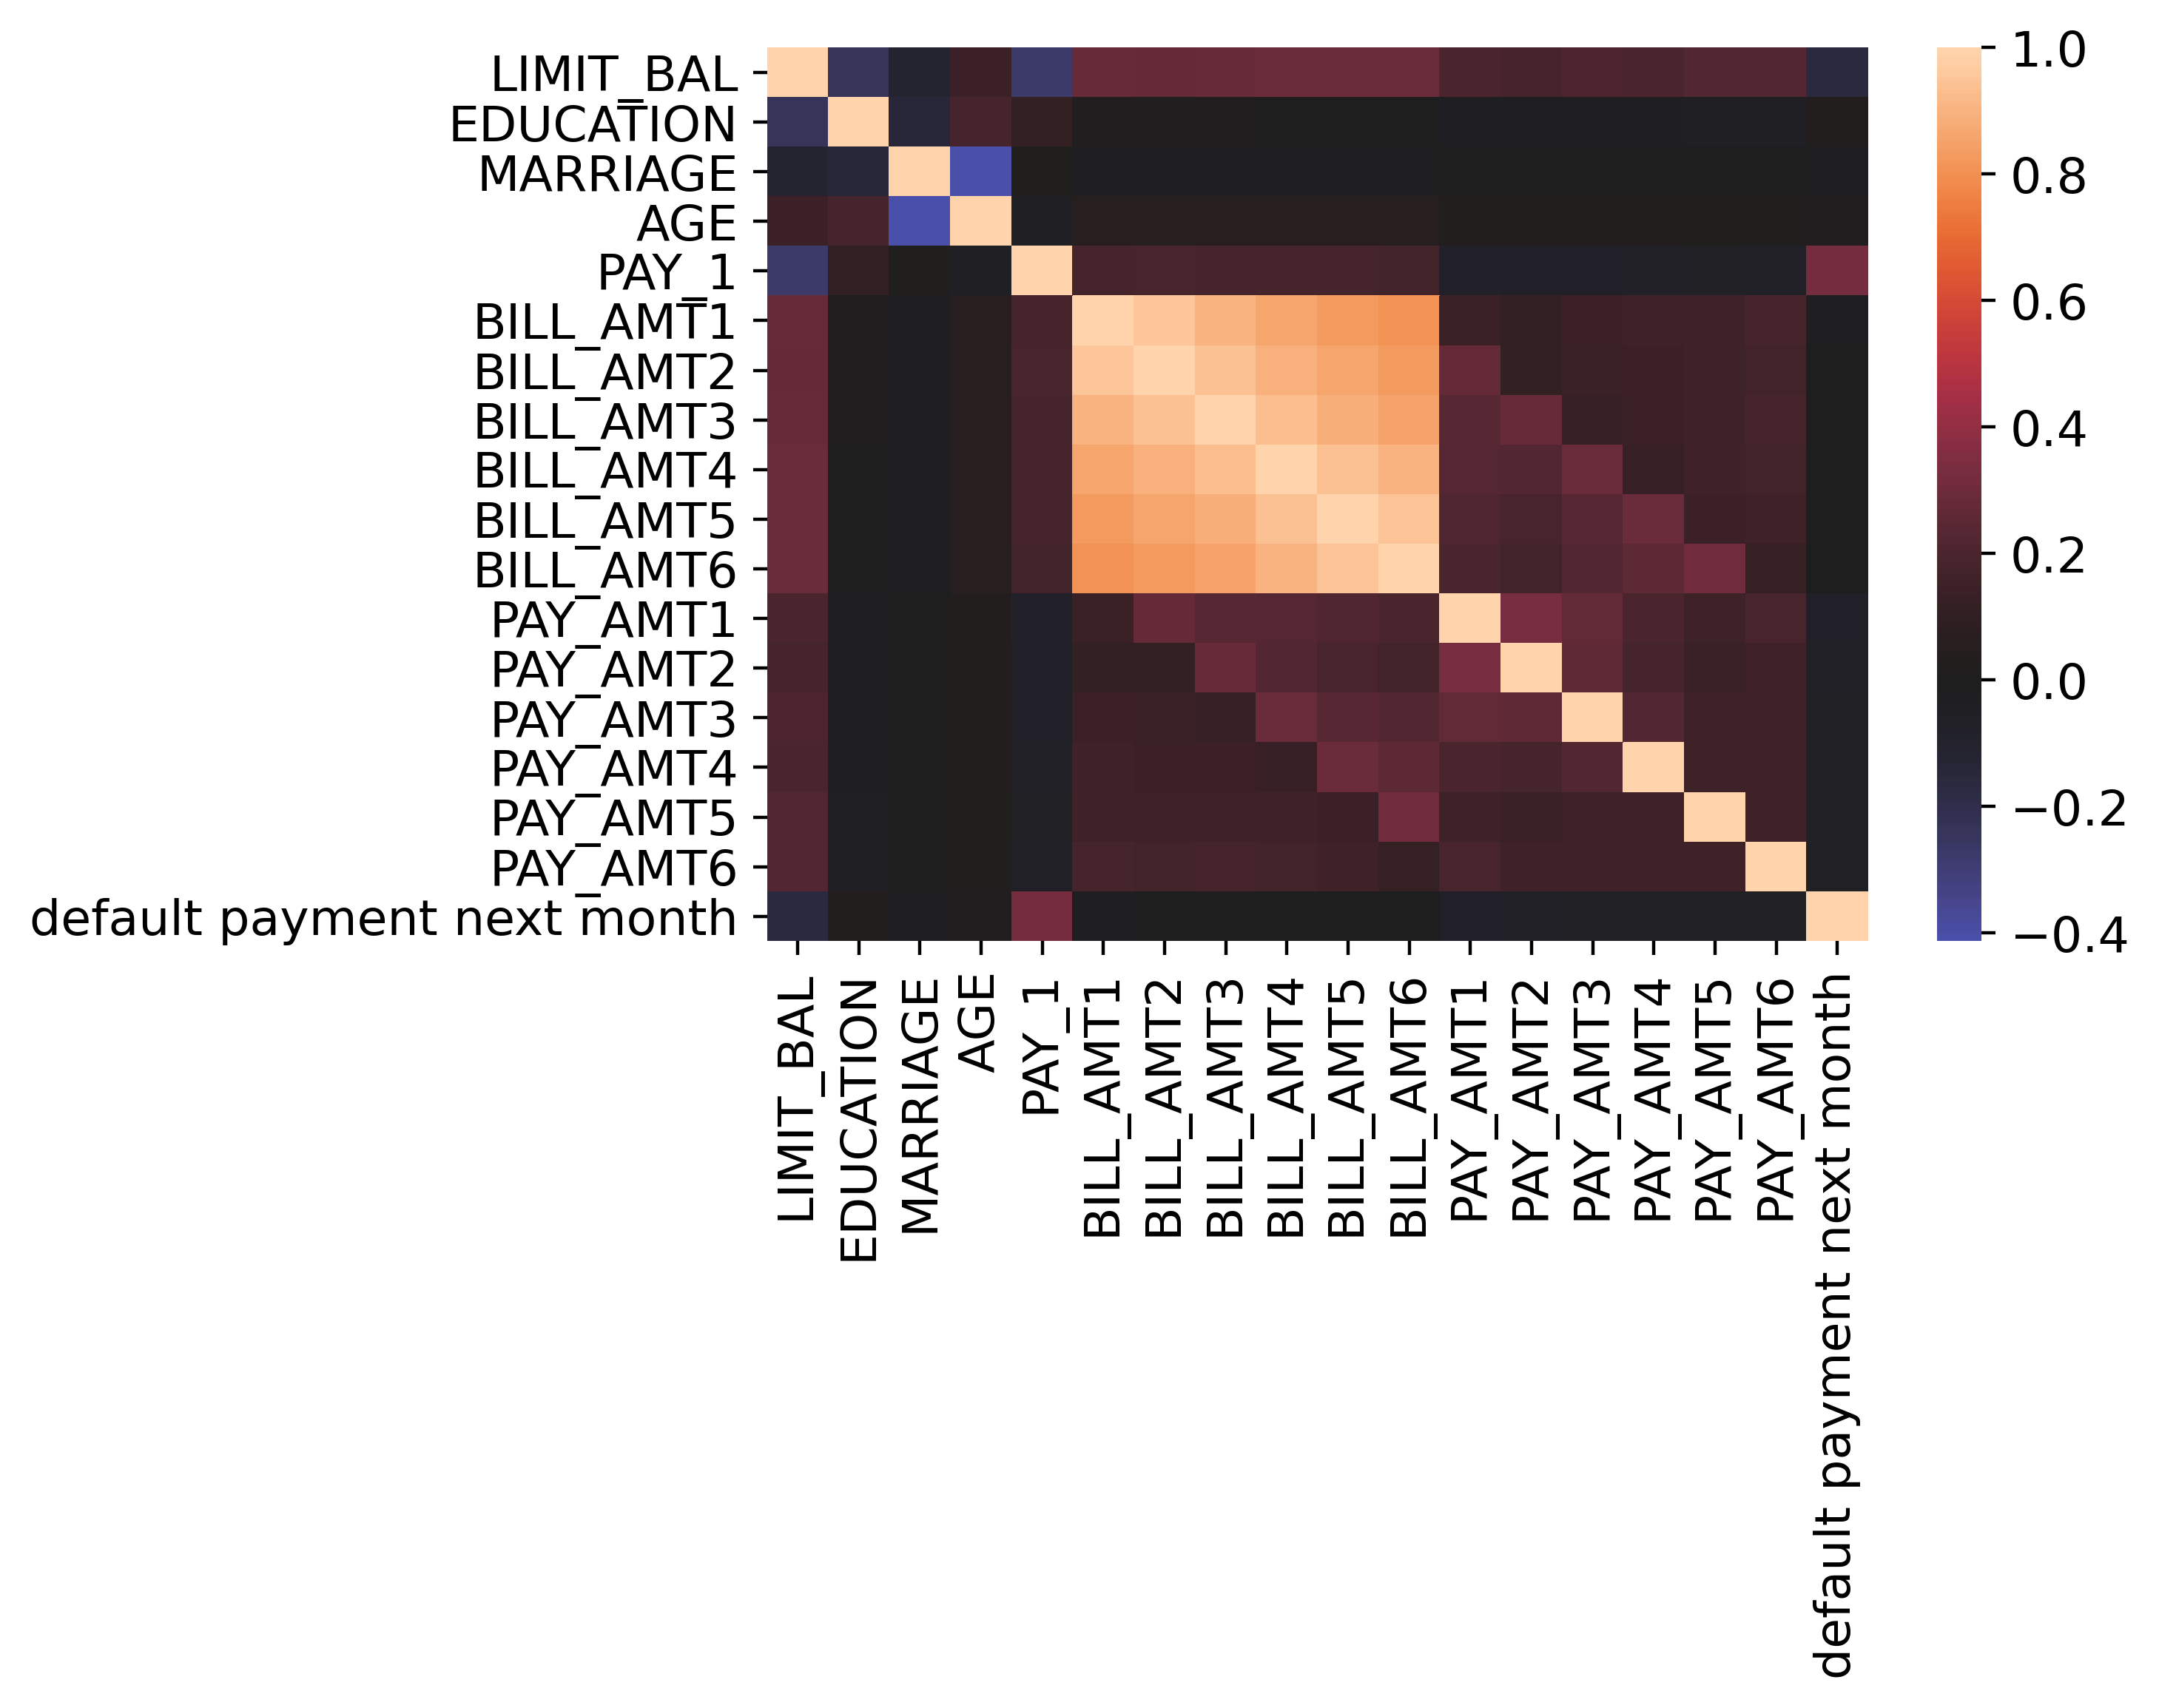

In [139]:
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0)


### F-test and Univariate Feature Selection

In [140]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [141]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

There are two outputs from f_classif: the F-statistic and the p-value, for 
the comparison of each feature to the response variable. Let's create a new 
DataFrame containing the feature names and these outputs, to facilitate our 
inspection. One way to specify a new DataFrame is by using a dictionary, with 
key:value pairs of column names and the data to be contained in each column. 
We show the DataFrame sorted (ascending) on p-value.

In [142]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
 'F statistic':f_stat,
'p value':f_p_value})
f_test_df.sort_values('p value')


,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [143]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile=20)

In [144]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [145]:
best_feature_ix = selector.get_support()
best_feature_ix


array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [147]:
features = features_response[:-1]
best_features = [features[counter]
 for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [148]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [149]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})

In [150]:
group_by_pay_mean_y 


,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


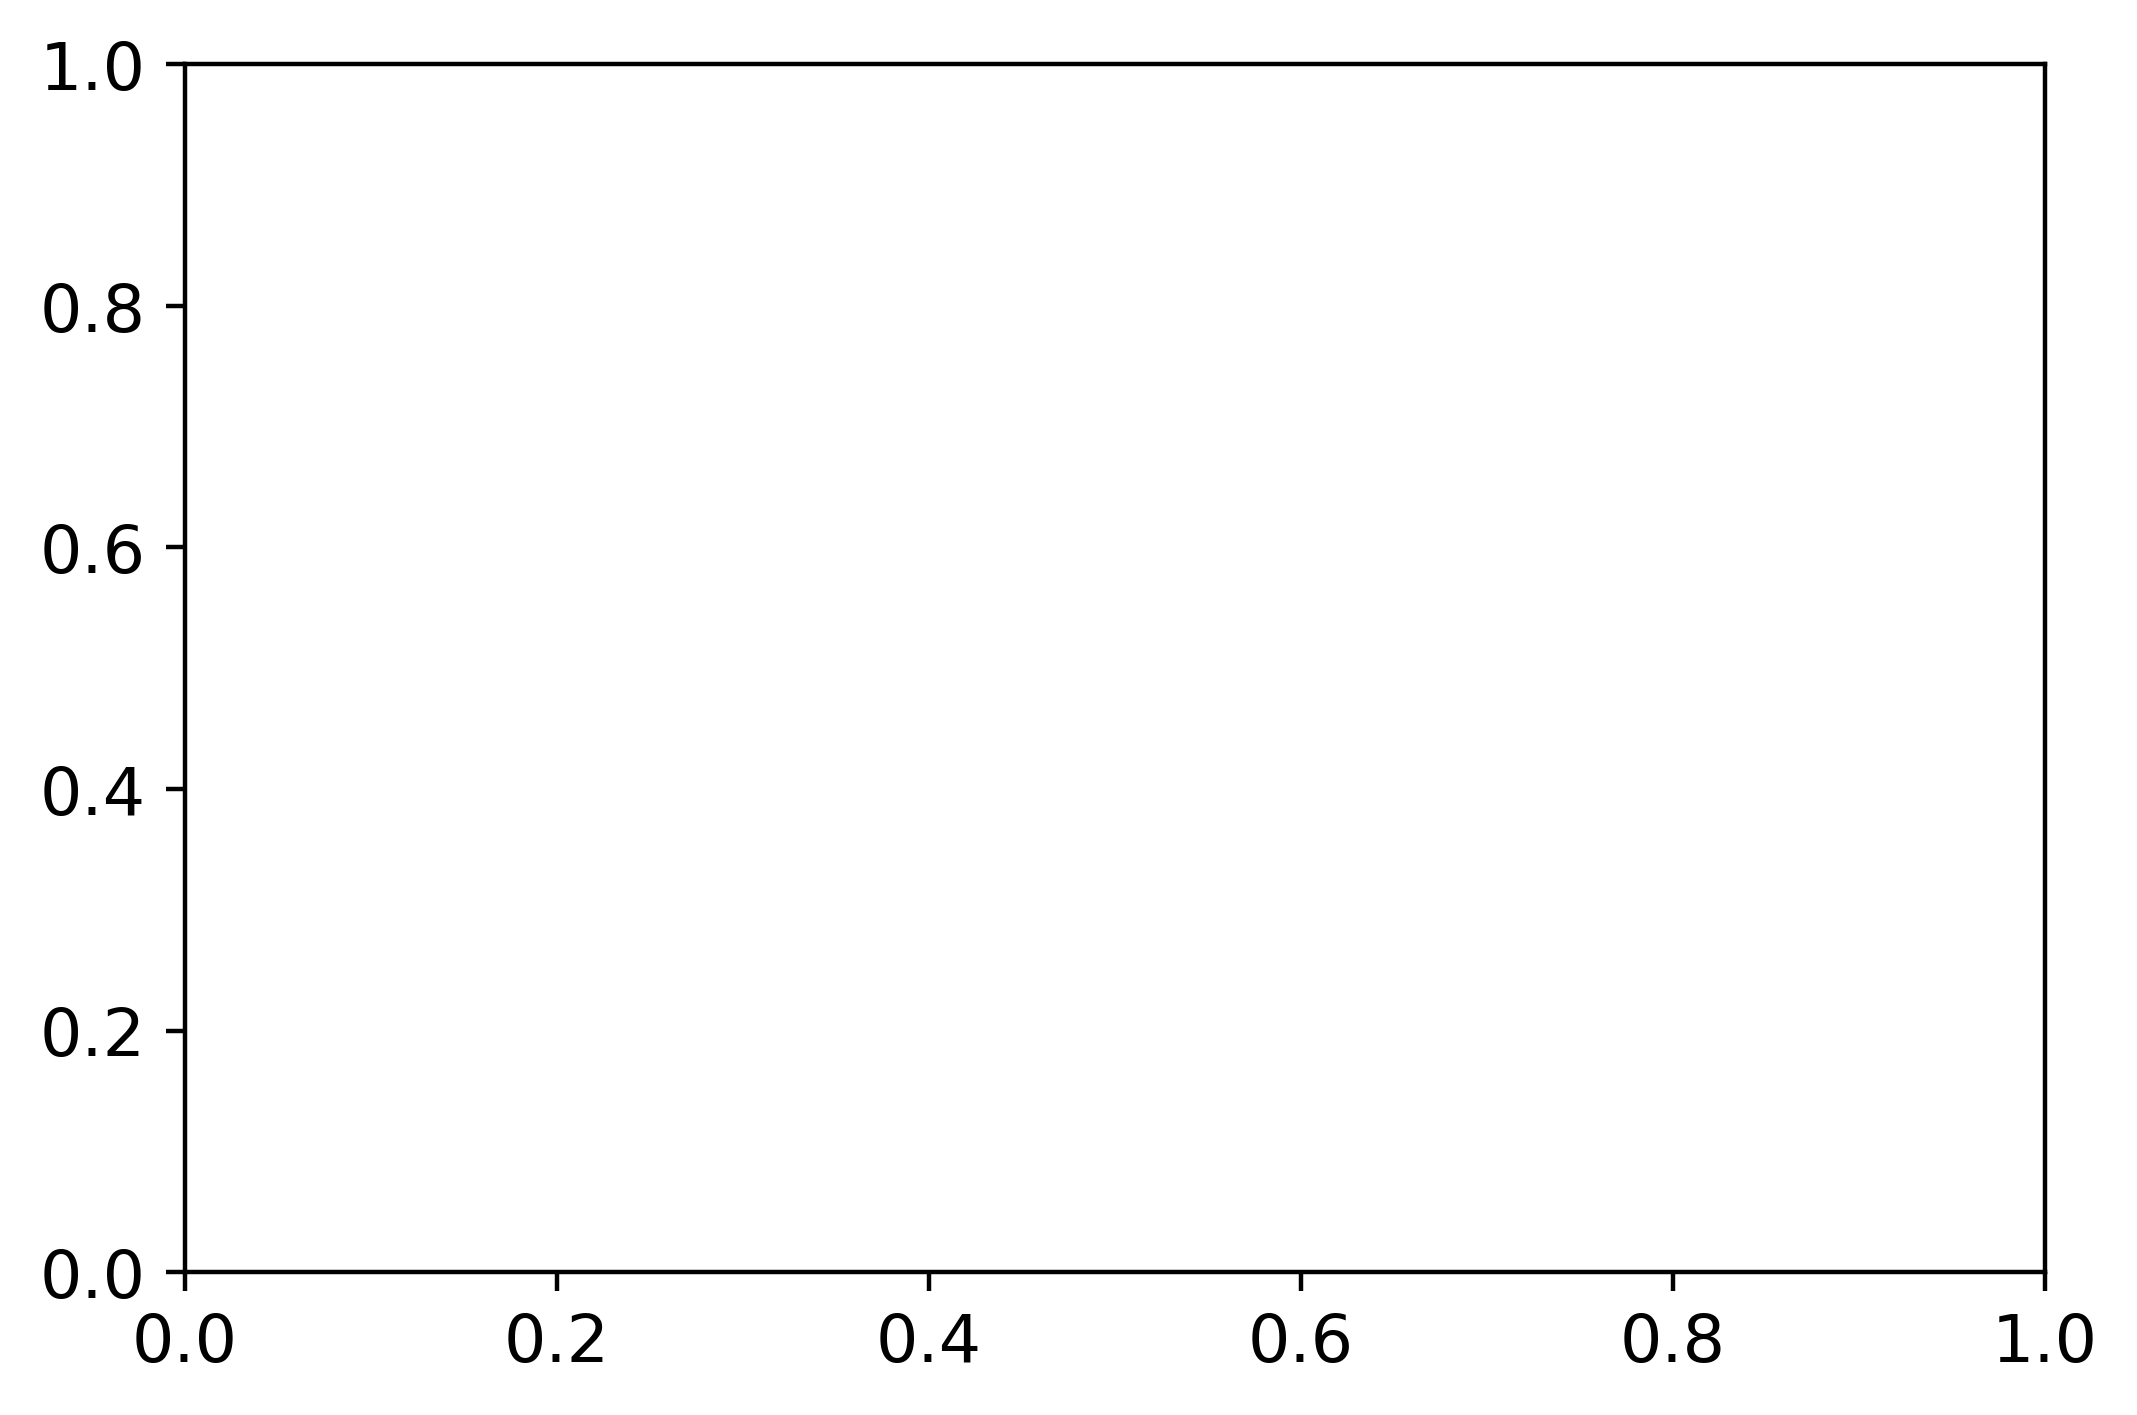

In [157]:
axes = plt.axes()

In [152]:
axes.axhline(overall_default_rate, color='red')

In [153]:
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

In [154]:
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])


In [158]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

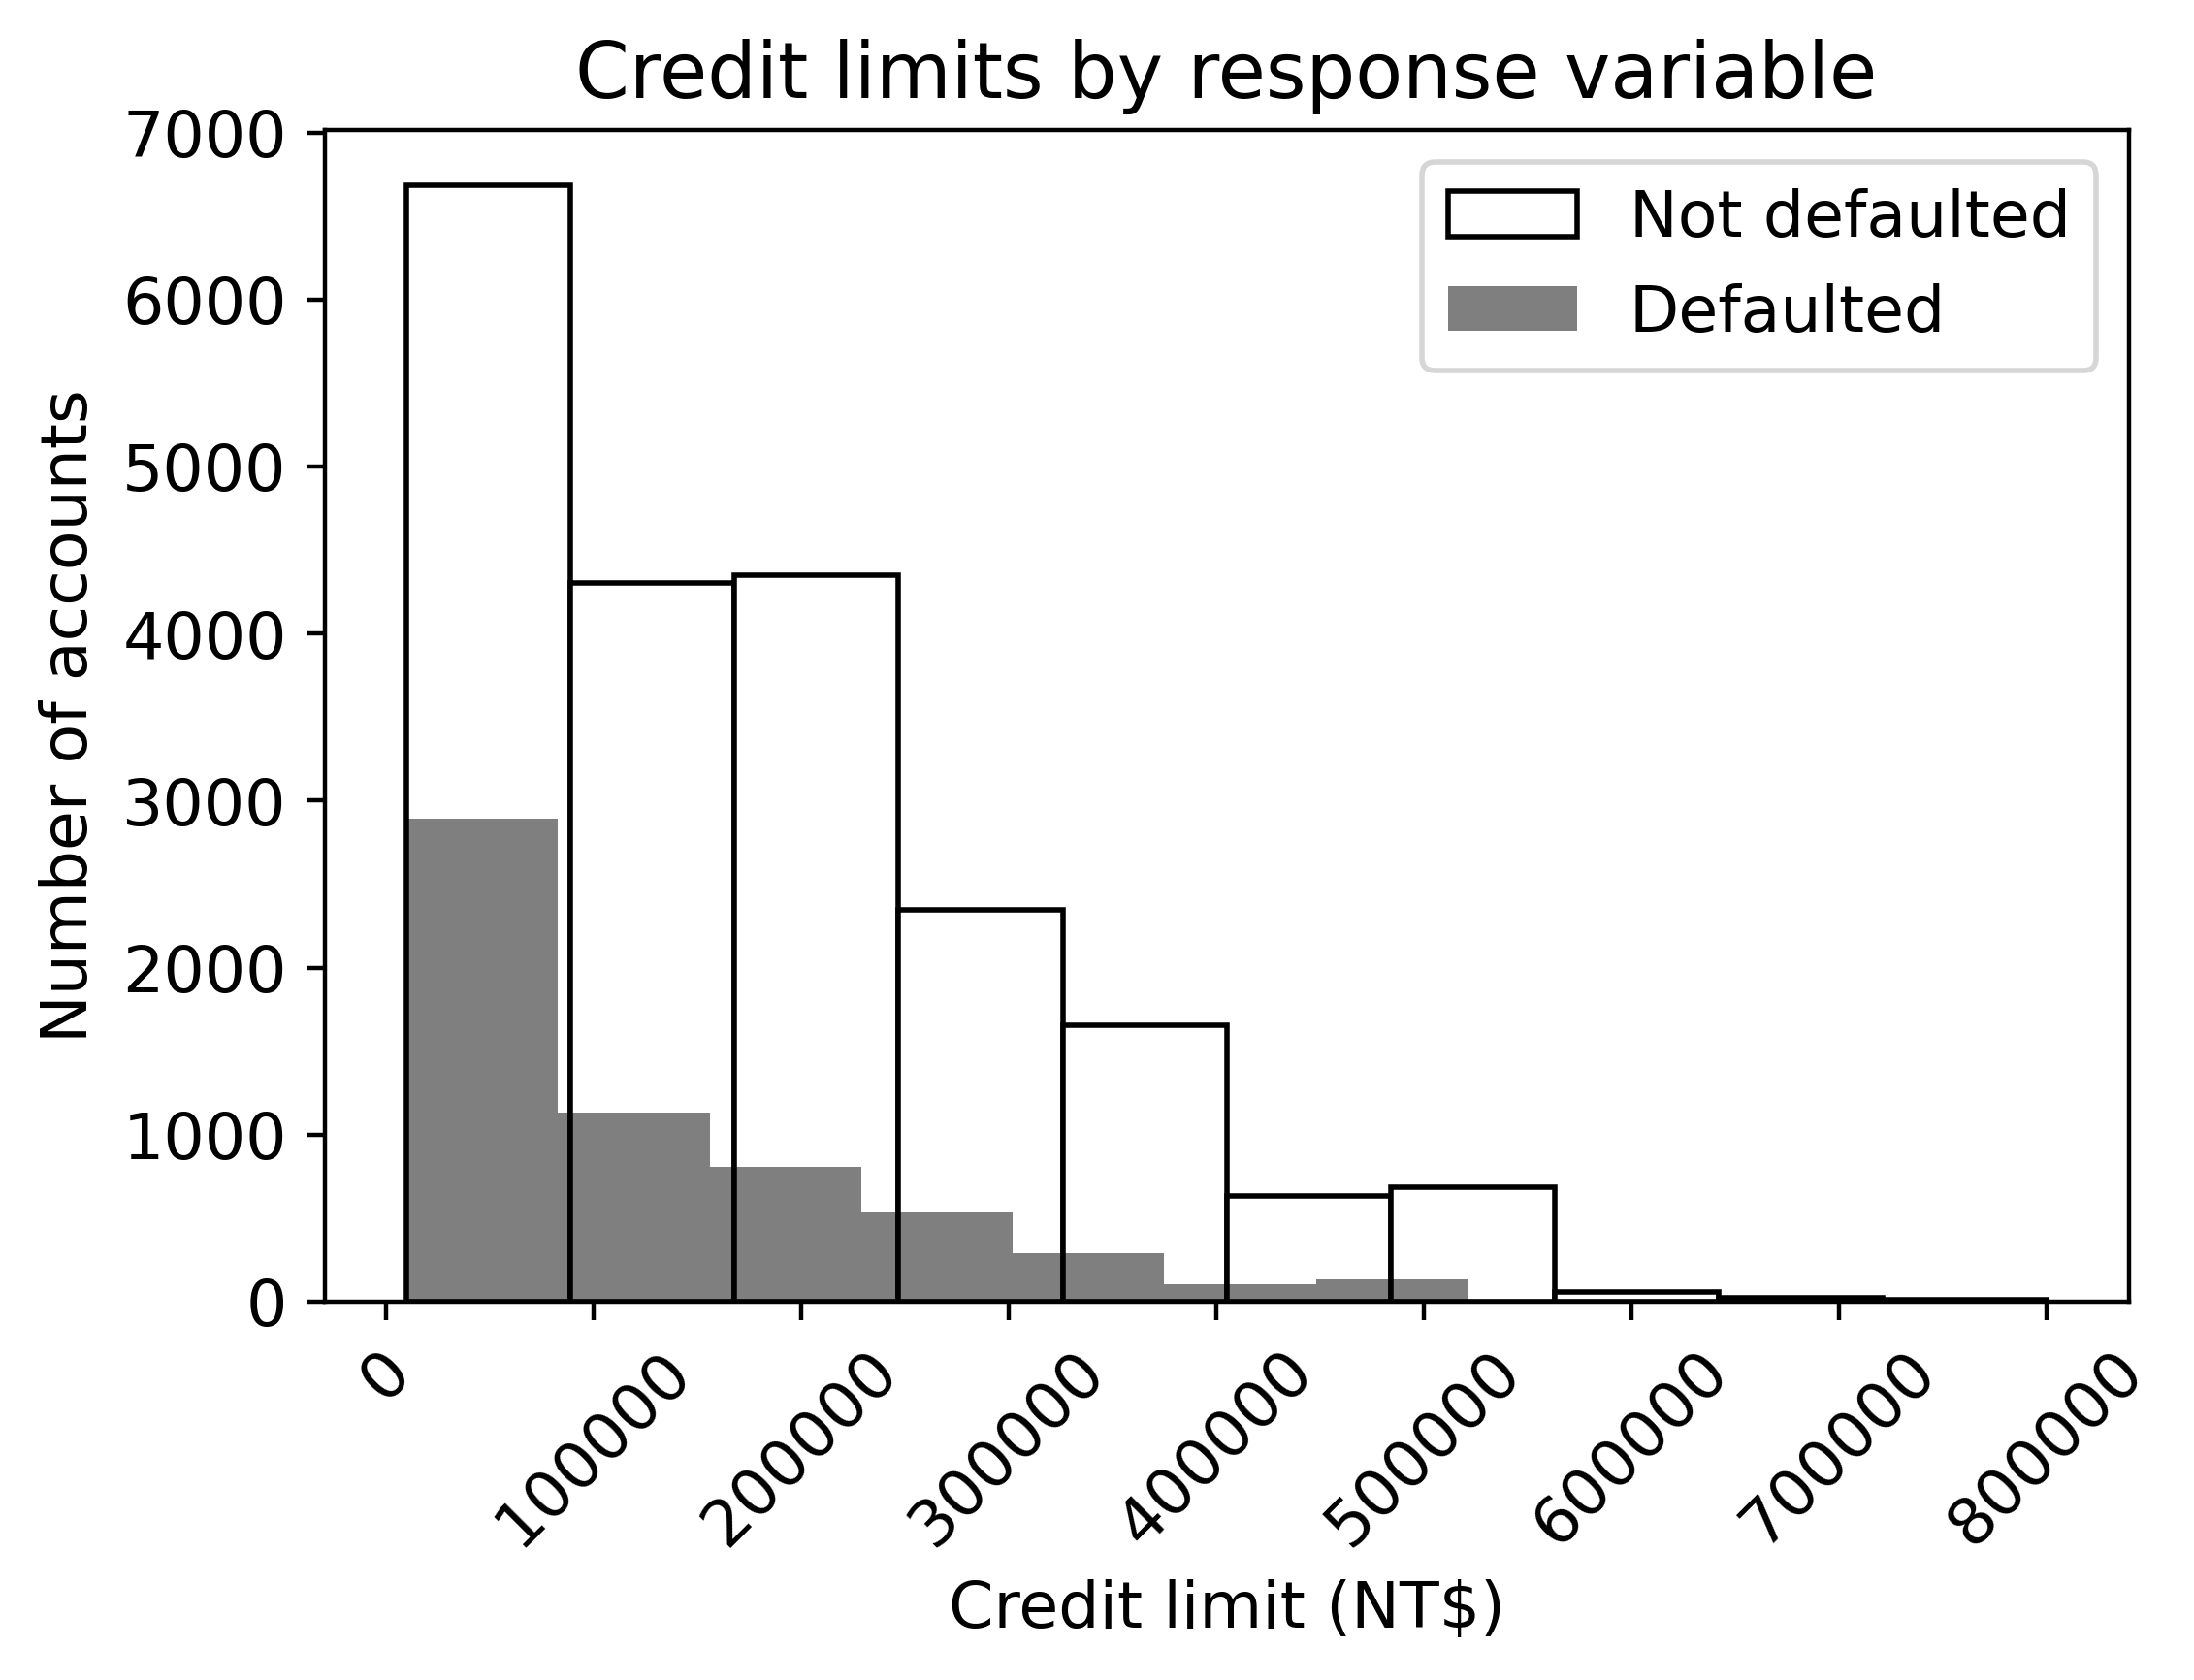

In [159]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],\
 edgecolor='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],\
 alpha=0.5, edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')


In [160]:
df['LIMIT_BAL'].max()

800000

In [161]:
bin_edges = list(range(0,850000,50000))
print(bin_edges)

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000]


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

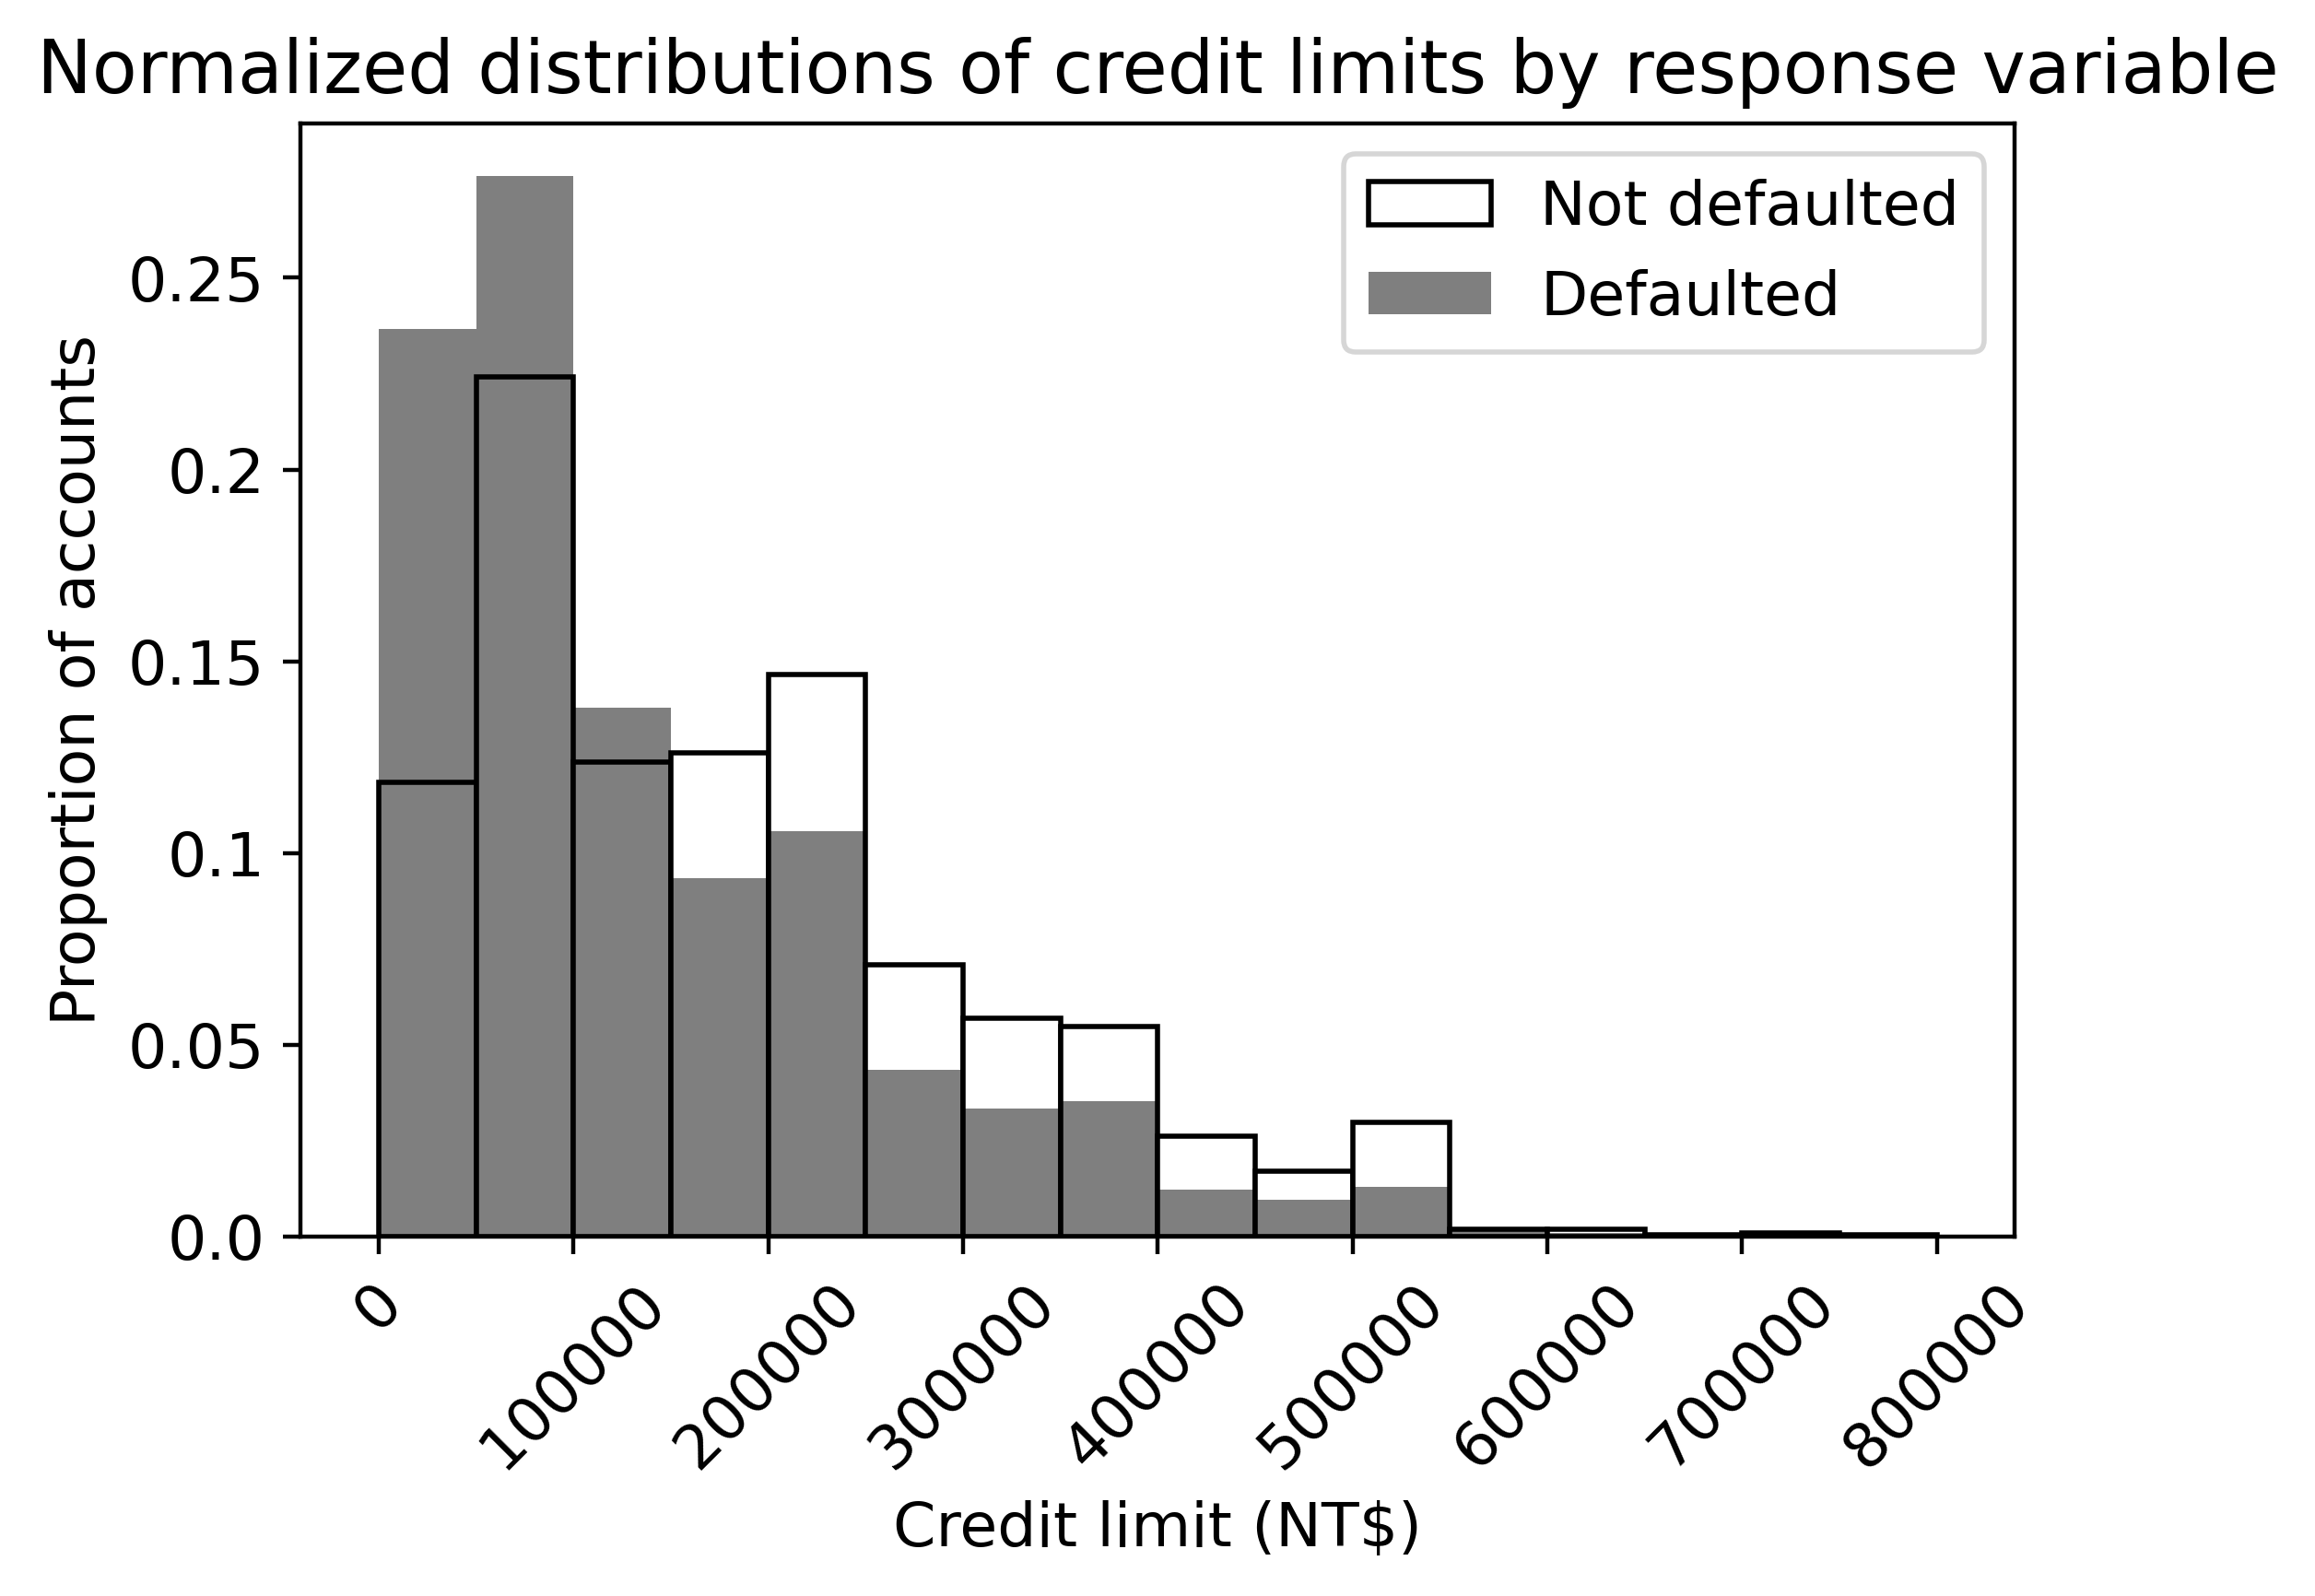

In [162]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(
 df.loc[neg_mask, 'LIMIT_BAL'],
 bins=bin_edges, density=True,
 edgecolor='black', color='white')
axes.hist(
 df.loc[pos_mask, 'LIMIT_BAL'],
 bins=bin_edges, density=True, alpha=0.5,
 edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of '\
 'credit limits by response variable')